<a href="https://colab.research.google.com/github/Giraj12/EDA--Capstone-Project/blob/main/Amazon_Shows_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Amazon prime tvshows/movies analysis




##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name -**          Giraj Neema



# **Project Summary -**

This exploratory data analysis (EDA) project investigates the content catalog of Amazon Prime Video available in the United States. The analysis was conducted on a structured dataset consisting of two CSV files that include metadata about movies and TV shows such as titles, genres, production countries, IMDb and TMDb scores, popularity metrics, release years, and more.

The dataset was first prepared by removing duplicates, handling null values and transforming list-type columns such as genres and production_countries into a normalized form using techniques like exploding. New features were engineered, including score and vote categories (imdb_score_category, imdb_votes_category) and era-based bins for release years (year_categories). These transformations enabled clearer group-wise comparisons in the visual analysis.

A series of visualizations were created to explore various aspects of the catalog:

1. Runtime & Popularity Distribution.Histogram of runtime with KDE and boxplot of tmdb_popularity.It Helped understand content duration and outliers in popularity.

2. A scatter plot was used to compare IMDb and TMDb scores and identify their relationship.

3. Pie charts illustrated the distribution of content across IMDb score and votes categories.

4. Bar plots highlighted genre frequency and average IMDb scores by genre.

5. Genre-Wise Categorization (4 Quadrants). Bar plots by genre for Underrated, Blockbusters, Top-performing, and Overrated groups.

6. Further bar plots examined top production countries and their average content scores.

7. A heatmap showed the percentage distribution of genres across the top 10 production countries.

8. cummulative Line and grouped bar charts analyzed content growth over time and content type distribution across eras.

9. Stacked bar chart and cumulative line chart visualized how genres contributions evolved across different time periods.

10. Another Stacked bar chart and cumulative line chart visualized how country contributions evolved across different time periods.

11. A boxplot explored the distribution of IMDb scores across eras.

12. Two bar plots displayed the top 10 highest-rated movies and shows based on IMDb scores.

13. Additional bar plots identified the most featured actors and directors by number of appearances.

14. A correlation heatmap examined relationships among numerical variables.

15. A pairplot provided a visual overview of distributions and pairwise relationships between IMDb and TMDb metrics, runtime, popularity, votes, and seasons.

Together, these visualizations enabled a comprehensive overview of the Amazon Prime Video content library, supporting detailed exploration across genres, countries, time periods, and performance metrics.



# **GitHub Link -**

https://github.com/Giraj12/EDA--Capstone-Project.git

# **Problem Statement**


### **BUSINESS PROBLEM OVERVIEW**

In today’s highly competitive streaming industry, platforms like Amazon Prime Video are constantly expanding their content libraries to attract and retain diverse audiences. With an ever-growing number of movies and TV shows, data-driven insights are essential to understand content trends, audience preferences, and to shape future content strategies.

This project analyzes a dataset containing information on Amazon Prime’s content available in the United States, comprising both categorical and numerical variables from two CSV files. The goal is to extract meaningful insights that can help inform decisions related to content acquisition, user engagement, and strategic growth.



#### **Define Your Business Objective?**

1. **Content Diversity:** What genres and categories dominate the platform?

2. **Regional Availability:** How does content distribution vary across different regions?
3. **Trends Over Time:** How has Amazon Prime’s content library evolved?
4. **IMDb Ratings & Popularity:** What are the highest-rated or most popular shows on the platform?

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import textwrap
import warnings
pd.set_option('display.max_column', None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', '{:.2f}'.format)  # keeps 2 decimal places
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
titles_df=pd.read_csv("/content/drive/MyDrive/amazon data/titles.csv/titles.csv")
credits_df=pd.read_csv("/content/drive/MyDrive/amazon data/credits.csv/credits.csv")

In [ ]:
titles_df.head() # first view of the titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.00,tt0850645,8.60,1092.00,15.42,7.60
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.10,63026.00,8.44,7.80
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.80,57835.00,11.27,7.40
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.90,30924.00,8.27,7.60


In [ ]:
credits_df.head() # first view of the credits_df

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [ ]:
# final data after inner join
df=pd.merge(titles_df,credits_df, on='id', how='inner') # This df contains information about those shows or movies for which actor and director's data is present.

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.00,tt0850645,8.60,1092.00,15.42,7.60,59401,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.00,tt0850645,8.60,1092.00,15.42,7.60,31460,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.00,tt0850645,8.60,1092.00,15.42,7.60,31461,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,21174,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28713,Marion Mack,Annabelle Lee,ACTOR


In [ ]:
df.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
124342,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.40,49.00,0.65,NaN,1938589,Sangam Shukla,Madhav,ACTOR
124343,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.40,49.00,0.65,NaN,1938565,Vijay Thakur,Sanjay Thakur,ACTOR
124344,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.40,49.00,0.65,NaN,728899,Vanya Wellens,Budhiya,ACTOR
124345,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.40,49.00,0.65,NaN,1938620,Vishwa Bhanu,Gissu,ACTOR
124346,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.40,49.00,0.65,NaN,1938620,Vishwa Bhanu,NaN,DIRECTOR


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(124347, 19)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    124347 non-null  object 
 1   title                 124347 non-null  object 
 2   type                  124347 non-null  object 
 3   description           124256 non-null  object 
 4   release_year          124347 non-null  int64  
 5   age_certification     56707 non-null   object 
 6   runtime               124347 non-null  int64  
 7   genres                124347 non-null  object 
 8   production_countries  124347 non-null  object 
 9   seasons               8153 non-null    float64
 10  imdb_id               119044 non-null  object 
 11  imdb_score            118296 non-null  float64
 12  imdb_votes            118272 non-null  float64
 13  tmdb_popularity       124332 non-null  float64
 14  tmdb_score            114082 non-null  float64
 15  

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(168)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().mean()*100

,0
id,0.00
title,0.00
type,0.00
description,0.07
release_year,0.00
age_certification,54.40
runtime,0.00
genres,0.00
production_countries,0.00
seasons,93.44


In [1]:
# Calculate missing values
missing_data = df.isnull().mean()*100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=missing_data.values, y=missing_data.index, palette='pastel')
plt.title('Missing Values per Column')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.show()



NameError: name 'df' is not defined

### What did you know about your dataset?

The dataset contains detailed information on TV shows and movies available on Amazon Prime, with a total of 124,347 entries and 19 features including title, genre, runtime, cast, director, popularity, seasons, age certification, and ratings from both IMDb and TMDb. During initial exploration, it was observed that the dataset has missing values, particularly in the seasons and age certification columns, which may be due to the nature of the content (e.g., movies not having seasons). Additionally, there are 168 duplicate rows that need to be handled during data cleaning to ensure accuracy in analysis.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(df.columns)

['id',
 'title',
 'type',
 'description',
 'release_year',
 'age_certification',
 'runtime',
 'genres',
 'production_countries',
 'seasons',
 'imdb_id',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score',
 'person_id',
 'name',
 'character',
 'role']

In [ ]:
# Dataset Describe
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,124347.00,124347.00,8153.00,118296.00,118272.00,124332.00,114082.00,124347.00
mean,1996.23,95.54,2.34,5.97,23242.81,10.17,5.99,406252.79
std,27.81,30.17,3.13,1.24,88401.51,40.74,1.32,561448.25
min,1912.00,1.00,1.00,1.10,5.00,0.00,0.80,1.00
25%,1983.00,83.00,1.00,5.20,287.00,1.88,5.30,38996.00
50%,2009.00,93.00,1.00,6.10,1250.00,3.88,6.10,133934.00
75%,2017.00,109.00,2.00,6.80,7067.00,8.79,6.80,571160.00
max,2022.00,540.00,49.00,9.90,1133692.00,1437.91,10.00,2371153.00


In [ ]:
df.describe(include='object')

,id,title,type,description,age_certification,genres,production_countries,imdb_id,name,character,role
count,124347,124347,124347,124256,56707,124347,124347,119044,124347,108040,124347
unique,8861,8748,2,8833,11,1965,482,8267,79758,71097,2
top,tm458582,Coming 2 America,MOVIE,Prince Akeem Joffer is set to become King of Z...,R,['drama'],['US'],tt6802400,George 'Gabby' Hayes,Himself,ACTOR
freq,137,137,116194,137,25931,9853,69385,137,49,1540,115952


### Variables Description

1. **id:**
Unique identifier for each content item (movie or show).

2. **title:**
Name of the TV show or movie.

3. **type:**
Indicates whether the content is a movie or TV show.

4. **description:**
A short summary or synopsis of the content.

5. **release_year:**
The year the content was first released.

6. **age_certification:**
Official age rating (e.g., PG, R, TV-MA), indicating content suitability.

7. **runtime:**
Duration of the movie or episode in minutes.

8. **genres:**
List of genres associated with the content (e.g., Drama, Comedy, Thriller).

9. **production_countries:**
Countries where the content was produced (may be a list).

10. **seasons:**
Number of seasons (only applicable for TV shows; null for movies).

11. **imdb_id**
Unique ID of the title on IMDb (can be used to fetch more metadata if needed).

12. **imdb_score**
IMDb rating score (typically on a scale from 0 to 10).

13. **imdb_votes**
Number of user votes for the IMDb score.
14. **tmdb_popularity**
Popularity score from TMDb (relative metric based on views, interactions, etc.).

15. **tmdb_score**
TMDb user rating (also typically on a scale from 0 to 10).

16. **person_id**
Unique identifier for a person involved in the content (actor, director, etc.).

17. **name**
Name of the person (actor, director, etc.).

18. **character**
The character name portrayed by the person (for actors).

19. **role**
The role of the person (e.g., ACTOR, DIRECTOR, etc.).




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
id,8861
title,8748
type,2
description,8833
release_year,110
age_certification,11
runtime,204
genres,1965
production_countries,482
seasons,30


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# duplicates treatment
df.drop_duplicates(inplace=True)





In [ ]:
# checking rows with same movie
condition=df.duplicated(subset=['id'])
df[condition].head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.00,tt0850645,8.60,1092.00,15.42,7.60,31460,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.00,tt0850645,8.60,1092.00,15.42,7.60,31461,Larry Fine,Larry,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28713,Marion Mack,Annabelle Lee,ACTOR
5,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28714,Glen Cavender,Captain Anderson,ACTOR
6,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28715,Jim Farley,General Thatcher,ACTOR
7,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,27348,Frederick Vroom,A Southern General,ACTOR
8,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28716,Charles Henry Smith,Annabelle's Father,ACTOR
9,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28718,Joe Keaton,Union General,ACTOR
10,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28721,Al St. John,Officer on Horseback (uncredited),ACTOR
11,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.20,89766.00,8.65,8.00,28717,Frank Barnes,Annabelle's Brother,ACTOR


In [ ]:
# check whether a actor has multiple roles in a same movie. If yes i will keep only one row for such actors.
condition=df.duplicated(subset=['id',
 'title',
 'type',
 'description',
 'release_year',
 'age_certification',
 'runtime',
 'genres',
 'production_countries',
 'seasons',
 'imdb_id',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score',
 'person_id',
 'name','role'],keep=False)

df[(condition)]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
1704,tm77319,Santa Fe Trail,MOVIE,As a penalty for fighting fellow classmates da...,1940,NaN,110,"['western', 'war', 'drama', 'history', 'romance']",['US'],NaN,tt0033021,6.20,3754.00,5.92,5.80,61125,Jack Deery,Party Guest (uncredited),ACTOR
1705,tm77319,Santa Fe Trail,MOVIE,As a penalty for fighting fellow classmates da...,1940,NaN,110,"['western', 'war', 'drama', 'history', 'romance']",['US'],NaN,tt0033021,6.20,3754.00,5.92,5.80,61125,Jack Deery,Preacher at Wedding (uncredited),ACTOR
1853,tm4525,He Walked by Night,MOVIE,"This film-noir piece, told in semi-documentary...",1949,NaN,79,"['thriller', 'crime']",['US'],NaN,tt0040427,7.10,5943.00,5.25,6.70,58703,Thomas Browne Henry,Dunning,ACTOR
1872,tm4525,He Walked by Night,MOVIE,"This film-noir piece, told in semi-documentary...",1949,NaN,79,"['thriller', 'crime']",['US'],NaN,tt0040427,7.10,5943.00,5.25,6.70,58703,Thomas Browne Henry,Dunning (uncredited),ACTOR
4412,tm73200,Li'l Abner,MOVIE,Li'l Abner becomes convinced that he is going ...,1940,G,78,"['comedy', 'romance']",['US'],NaN,tt0032703,4.90,457.00,3.42,8.50,21174,Buster Keaton,Lonesome Polecat,ACTOR
4423,tm73200,Li'l Abner,MOVIE,Li'l Abner becomes convinced that he is going ...,1940,G,78,"['comedy', 'romance']",['US'],NaN,tt0032703,4.90,457.00,3.42,8.50,21174,Buster Keaton,NaN,ACTOR
6047,tm85300,Outlaws of the Desert,MOVIE,"Hoppy, Johnny and California go to Arabia to b...",1941,NaN,66,"['western', 'action']",['US'],NaN,tt0033989,5.80,151.00,1.10,NaN,134027,Bill Nestell,Man from Waukegan,ACTOR
6048,tm85300,Outlaws of the Desert,MOVIE,"Hoppy, Johnny and California go to Arabia to b...",1941,NaN,66,"['western', 'action']",['US'],NaN,tt0033989,5.80,151.00,1.10,NaN,134027,Bill Nestell,Cowhand,ACTOR
6218,tm54261,Indiscreet,MOVIE,A young woman jeopardizes the relationship wit...,1931,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0022000,6.20,1447.00,1.06,5.80,69200,Sam Lufkin,Ship's Purser (uncredited),ACTOR
6219,tm54261,Indiscreet,MOVIE,A young woman jeopardizes the relationship wit...,1931,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0022000,6.20,1447.00,1.06,5.80,69200,Sam Lufkin,Baseball Captain (uncredited),ACTOR


In [ ]:
# keeping only one row for those actors who did multiple roles in a same movie.
df.drop_duplicates(subset=['id',
 'title',
 'type',
 'description',
 'release_year',
 'age_certification',
 'runtime',
 'genres',
 'production_countries',
 'seasons',
 'imdb_id',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score',
 'person_id',
 'name','role'],keep='first', inplace=True)

In [ ]:
df.shape

(124003, 19)

In [ ]:
# null value treatment
# age_certification
# df['age_certification'].value_counts()
# df_sub=df[df['age_certification'].isna()]
# df_sub[df_sub['release_year']>2019].head(200)


# For this column almost 55% values are null so i checked about the ratings of some shows and movies randomly.
# from research i found out that some movies or shows were released even before rating system was intoduced, so they were not rated thats why the age_certification value for those shows/movies is Null.
# But there are other movies as well that were released after rating system was intoduced and have different ratings such as tv-ma,tv-pg.
# So for the above column there is no clear direction for imputing missing values, so i will drop the column itself.
df.drop('age_certification', axis=1, inplace=True)

In [ ]:
#seasons
temp_df=df[df['seasons'].isnull()]
temp_df['type'].value_counts()

,count
type,
MOVIE,115874


In [ ]:
# Here all the values which are null have type as movie
# for movies seasons should be zero
# replacing null values with 0.
df['seasons'].fillna(0, inplace=True)
df.isnull().mean()*100

<ipython-input-27-bf40719bc765>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seasons'].fillna(0, inplace=True)


,0
id,0.00
title,0.00
type,0.00
description,0.07
release_year,0.00
runtime,0.00
genres,0.00
production_countries,0.00
seasons,0.00
imdb_id,4.27


In [ ]:
# filtering out only useful columns for analysis.
key_columns=['id',
 'title',
 'type',
#  'description',
 'release_year',
 'runtime',
 'genres',
 'production_countries',
 'seasons',
#  'imdb_id',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score',
 'person_id',
 'name',
#  'character',
 'role']
# description and character gives information about whats in the movie or show but did not indicate any pattern about movies streaming online.
# imdb_id might be useful to extract some metadata about the movie but in this EDA i was provided with dataset that do not include any imdb related table therefore filtering imdb_id
df=df[key_columns]

In [ ]:
df.isnull().mean()*100

,0
id,0.00
title,0.00
type,0.00
release_year,0.00
runtime,0.00
genres,0.00
production_countries,0.00
seasons,0.00
imdb_score,4.88
imdb_votes,4.90


In [ ]:
# Only 0.01% values are null in tmdb_popularity.
# dropping those rows where tmdb_popularity is null.
df.dropna(subset=['tmdb_popularity'], inplace=True)

In [ ]:
df.isnull().mean()*100

,0
id,0.00
title,0.00
type,0.00
release_year,0.00
runtime,0.00
genres,0.00
production_countries,0.00
seasons,0.00
imdb_score,4.88
imdb_votes,4.90


In [ ]:
# for imdb_score, imdb_votes, tmdb_score there are about 5-10% null values present.
# I will check for skewness. if skewed then imputing by median else mean.
# imdb_votes
df['imdb_votes'].skew()

np.float64(7.05212943892174)

In [ ]:
# skewness is positive
# imputing by median
df['imdb_votes'].fillna(df['imdb_votes'].median(), inplace=True)

<ipython-input-33-27866396de98>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['imdb_votes'].fillna(df['imdb_votes'].median(), inplace=True)


In [ ]:
# imdb_score
df['imdb_score'].skew()


np.float64(-0.4223313253325291)

In [ ]:
# skewness is near to zero
# imputing by mean
df['imdb_score'].fillna(df['imdb_score'].mean(), inplace=True)

<ipython-input-35-32f17baeb201>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['imdb_score'].fillna(df['imdb_score'].mean(), inplace=True)


In [ ]:
# tmdb_score
df['tmdb_score'].skew()

np.float64(-0.5241484140546983)

In [ ]:
# skewness is near to zero
# imputing by mean
df['tmdb_score'].fillna(df['tmdb_score'].mean(), inplace=True)

<ipython-input-37-aa165c1ac572>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tmdb_score'].fillna(df['tmdb_score'].mean(), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123988 entries, 0 to 124346
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    123988 non-null  object 
 1   title                 123988 non-null  object 
 2   type                  123988 non-null  object 
 3   release_year          123988 non-null  int64  
 4   runtime               123988 non-null  int64  
 5   genres                123988 non-null  object 
 6   production_countries  123988 non-null  object 
 7   seasons               123988 non-null  float64
 8   imdb_score            123988 non-null  float64
 9   imdb_votes            123988 non-null  float64
 10  tmdb_popularity       123988 non-null  float64
 11  tmdb_score            123988 non-null  float64
 12  person_id             123988 non-null  int64  
 13  name                  123988 non-null  object 
 14  role                  123988 non-null  object 
dtypes: fl

In [ ]:
# data type of seasons and votes are float. It should be int
df['seasons']=df['seasons'].astype("int")
df['imdb_votes']=df['imdb_votes'].astype("int")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123988 entries, 0 to 124346
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    123988 non-null  object 
 1   title                 123988 non-null  object 
 2   type                  123988 non-null  object 
 3   release_year          123988 non-null  int64  
 4   runtime               123988 non-null  int64  
 5   genres                123988 non-null  object 
 6   production_countries  123988 non-null  object 
 7   seasons               123988 non-null  int64  
 8   imdb_score            123988 non-null  float64
 9   imdb_votes            123988 non-null  int64  
 10  tmdb_popularity       123988 non-null  float64
 11  tmdb_score            123988 non-null  float64
 12  person_id             123988 non-null  int64  
 13  name                  123988 non-null  object 
 14  role                  123988 non-null  object 
dtypes: fl

In [ ]:
# checking for disguised null values in the data in google sheets.
df.to_csv("/content/drive/MyDrive/amazon_data.csv", index=False)

From google sheets found out that:

*   There is no disguised null values('null', 'missing','unknown','-999') in categorical columns such as title,type,etc.





In [ ]:
# checking genre
df['genres'].head()

,genres
0,"['comedy', 'family', 'animation', 'action', 'f..."
1,"['comedy', 'family', 'animation', 'action', 'f..."
2,"['comedy', 'family', 'animation', 'action', 'f..."
3,"['action', 'drama', 'war', 'western', 'comedy'..."
4,"['action', 'drama', 'war', 'western', 'comedy'..."


In [ ]:
# list of generes are present for each movie
# exploding df based on genre to analyse individual genre.
df['genres']=df['genres'].apply(eval) # converting to actual list from list like string.
df=df.explode('genres')

In [ ]:
# list of production countries are present for each movie
# exploding df based on countries to analyse movies by regions.
df['production_countries']=df['production_countries'].apply(eval) # converting to actual list from list like string.
df=df.explode('production_countries')

In [ ]:
df.head(15)

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,ts20945,The Three Stooges,SHOW,1934,19,comedy,US,26,8.60,1092,15.42,7.60,59401,Joe Besser,ACTOR
0,ts20945,The Three Stooges,SHOW,1934,19,family,US,26,8.60,1092,15.42,7.60,59401,Joe Besser,ACTOR
0,ts20945,The Three Stooges,SHOW,1934,19,animation,US,26,8.60,1092,15.42,7.60,59401,Joe Besser,ACTOR
0,ts20945,The Three Stooges,SHOW,1934,19,action,US,26,8.60,1092,15.42,7.60,59401,Joe Besser,ACTOR
0,ts20945,The Three Stooges,SHOW,1934,19,fantasy,US,26,8.60,1092,15.42,7.60,59401,Joe Besser,ACTOR
0,ts20945,The Three Stooges,SHOW,1934,19,horror,US,26,8.60,1092,15.42,7.60,59401,Joe Besser,ACTOR
1,ts20945,The Three Stooges,SHOW,1934,19,comedy,US,26,8.60,1092,15.42,7.60,31460,Moe Howard,ACTOR
1,ts20945,The Three Stooges,SHOW,1934,19,family,US,26,8.60,1092,15.42,7.60,31460,Moe Howard,ACTOR
1,ts20945,The Three Stooges,SHOW,1934,19,animation,US,26,8.60,1092,15.42,7.60,31460,Moe Howard,ACTOR
1,ts20945,The Three Stooges,SHOW,1934,19,action,US,26,8.60,1092,15.42,7.60,31460,Moe Howard,ACTOR


In [ ]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
df[['imdb_score', 'imdb_votes']].describe()

,imdb_score,imdb_votes
count,392340.00,392340.00
mean,6.05,30350.34
std,1.19,95583.55
min,1.10,5.00
25%,5.40,509.00
50%,6.10,2210.00
75%,6.90,13443.00
max,9.90,1133692.00


In [ ]:
# create imdb_score_category
#imdb_score<6--> low rated
#imdb_score>=6 and imdb_score<7.5 --> moderately rated
#imdb_score>7.5 --> highly rated

# create imdb_votes_category
# imdb_votes<2200 --> emerging
# imdb_votes>=2200 and imdb_votes<14000 --> established
# imdb_votes> 14000--> mainstream


# function to create categories
def create_categories(row):
  score=row['imdb_score']
  votes=row['imdb_votes']
  score_cat, votes_cat='',''

  if score<6:
    score_cat='low_rated'
  elif score>=6 and score<7.5:
    score_cat='moderately_rated'
  else:
    score_cat="highly rated"

  if votes<2200:
    votes_cat='emerging'
  elif votes>=2200 and votes<14000:
    votes_cat='established'
  else:
    votes_cat="mainstream"

  return pd.Series([score_cat, votes_cat], index=['imdb_score_category', 'imdb_votes_category'])

df[['imdb_score_category', 'imdb_votes_category']]=df.apply(create_categories, axis=1)

df.head()

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role,imdb_score_category,imdb_votes_category
0,ts20945,The Three Stooges,SHOW,1934,19,comedy,US,26,8.60,1092,15.42,7.60,59401,Joe Besser,ACTOR,highly rated,emerging
0,ts20945,The Three Stooges,SHOW,1934,19,family,US,26,8.60,1092,15.42,7.60,59401,Joe Besser,ACTOR,highly rated,emerging
0,ts20945,The Three Stooges,SHOW,1934,19,animation,US,26,8.60,1092,15.42,7.60,59401,Joe Besser,ACTOR,highly rated,emerging
0,ts20945,The Three Stooges,SHOW,1934,19,action,US,26,8.60,1092,15.42,7.60,59401,Joe Besser,ACTOR,highly rated,emerging
0,ts20945,The Three Stooges,SHOW,1934,19,fantasy,US,26,8.60,1092,15.42,7.60,59401,Joe Besser,ACTOR,highly rated,emerging


In [ ]:
# checking for null values after exploding
df.isnull().mean()*100

,0
id,0.00
title,0.00
type,0.00
release_year,0.00
runtime,0.00
genres,0.11
production_countries,0.99
seasons,0.00
imdb_score,0.00
imdb_votes,0.00


In [ ]:
# There are 0.1% values in genre and 0.9% values in production_countries which are null so drop them.
df.dropna(subset=['genres', 'production_countries'], inplace=True)


In [ ]:
df.isnull().mean()

,0
id,0.00
title,0.00
type,0.00
release_year,0.00
runtime,0.00
genres,0.00
production_countries,0.00
seasons,0.00
imdb_score,0.00
imdb_votes,0.00


In [ ]:
# checking for disguised null values after exploding
df['genres'].value_counts()

,count
genres,
drama,83438
comedy,46893
thriller,40427
action,36804
romance,32865
crime,24210
european,22636
horror,15462
scifi,14036


In [ ]:
df['production_countries'].value_counts()

,count
production_countries,
US,201815
GB,33870
IN,28362
CA,17117
FR,16798
DE,10306
JP,9175
IT,7881
AU,5522


In [ ]:
# upon inspecting found that there is disguised duplicate as 'United States of America'-->another place holder for 'US'
# replacing this duplicates with US
df['production_countries'].replace({'United States of America':"US"}, inplace=True)

In [ ]:
df['production_countries'].value_counts()

,count
production_countries,
US,201887
GB,33870
IN,28362
CA,17117
FR,16798
DE,10306
JP,9175
IT,7881
AU,5522


In [3]:
# final data
# df.to_csv("/content/drive/MyDrive/cleaned_data.csv", index=False)
df=pd.read_csv("/content/drive/MyDrive/cleaned_data.csv")

### What all manipulations have you done and insights you found?

**Duplicates:**
1. Identified ~9,000 unique ids representing distinct movies.

2. On inspecting rows with the same movie ID, found that duplicates often correspond to different actors or directors involved in the same film.

3. Also observed cases where the same actor appeared multiple times (e.g., in double roles), creating near-duplicate rows differing only in the character field.

4. To address this, removed exact duplicates first, then dropped near-duplicates using all columns except character as the subset for comparison.

**Missing Values:**

1. Dropped the age_certification column due to ~55% missing and no clear pattern.

2. Imputed missing values in numerical columns (imdb_score, imdb_votes, tmdb_score, tmdb_popularity) using mean or median.

**Data Types:** Converted imdb_votes and seasons from float to integer.

**Normalization:** Parsed and exploded list-like string columns (genres and production_countries) to enable genre- and country-specific analysis.

**Post-Exploding Cleanup:** After exploding list columns, null values in genres and production_countries were removed. No disguised nulls were found. Disguised duplicates were resolved by standardizing inconsistent entries (e.g., replacing "United States of America" with "US").

**Feature Engineering:**

1. Created imdb_score_category based on rating thresholds (Low rated, Moderately rated, Highly rated).

2. Created imdb_votes_category based on vote count ranges (Emerging, Established, Mainstream).

**Column Filtering:** Retained only relevant columns for analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 1: Runtime & Popularity Distribution

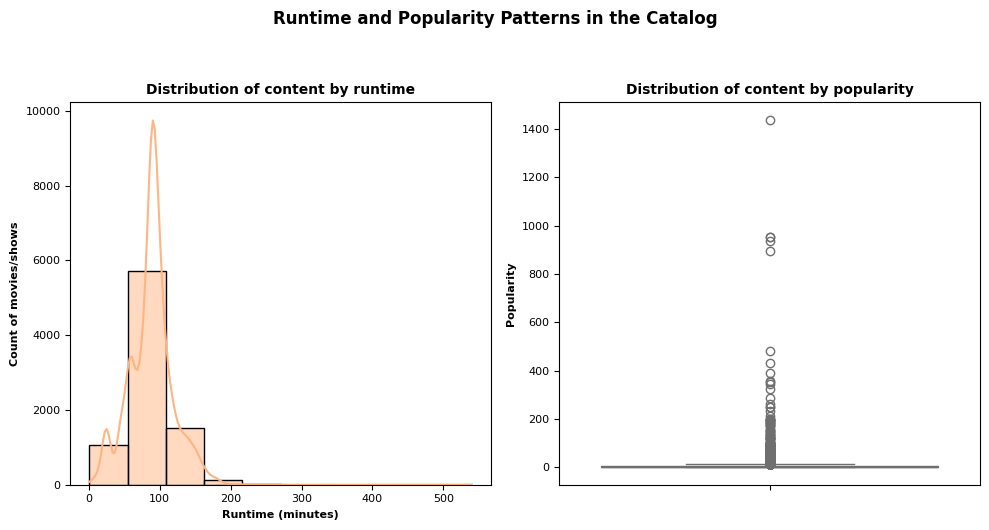

In [5]:
# Chart - 1 visualization code
# Distribution of content based on runtime and popularity.

# Dataset contain information about same movie/show in different rows (actors, directors)
# we need to keep rows with unique movie in order to get the correct distribution
df_unique=df.drop_duplicates(subset='id')
fig,ax=plt.subplots(1,2, figsize=(10,5))
# runtime
sns.histplot(data=df_unique, x='runtime', bins=10, kde=True, color=sns.color_palette('pastel')[1],ax=ax[0])
ax[0].set_title("Distribution of content by runtime", fontdict={'fontsize': 10, 'fontweight': 'bold'})
ax[0].set_xlabel('Runtime (minutes)', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[0].set_ylabel('Count of movies/shows', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[0].tick_params(axis='x', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)

# popularity
sns.boxplot(data=df_unique, y='tmdb_popularity', ax=ax[1], color=sns.color_palette('pastel')[2])

ax[1].set_title("Distribution of content by popularity", fontdict={'fontsize': 10, 'fontweight': 'bold'})
ax[1].set_ylabel('Popularity', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[1].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='y', labelsize=8)

plt.suptitle("Runtime and Popularity Patterns in the Catalog",
             fontsize=12, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

1. Histogram shows how runtime is distributed overall — you see where most movies fall.

2. Boxplot on popularity shows how audience attention is distributed — highlighting skew and outliers

##### 2. What is/are the insight(s) found from the chart?

1. Most movies and shows are between 90 and 120 minutes long.
That’s the usual length for a full movie — long enough to tell a complete story but short enough to keep the audience interested. This means most content sticks to a format that people are used to and comfortable watching.

2. Most movies aren’t very popular, but a few are extremely popular.
When we look at TMDB popularity scores, most movies fall in the low to medium range (0–100). But there are some movies that have very high popularity — these are likely big hits or blockbusters. So, just a few titles get a lot of attention, while most movies get only a little.

3. While the majority of content fits the typical runtime range, popularity does not necessarily correlate with length — many standard-length films have modest popularity, whereas a few titles, regardless of runtime, attract significantly higher attention.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Sticking to the standard runtime is a safe strategy — it matches audience expectations and reduces production risk.

2. Invest more in marketing, promoting, or acquiring high-potential movies or shows (e.g. those with popular actors, directors, or successful genres).

3. Maintain a broad content library for variety, but focus promotions on potential blockbusters.

4. Runtime alone isn’t enough to make a movie successful — content quality, cast, marketing, and genre also matter therefore Don’t rely only on standard formats. Use data (genre trends, past popularity) to guide investment in storytelling and content quality.

#### Chart - 2 IMDb vs. TMDb Score Comparison

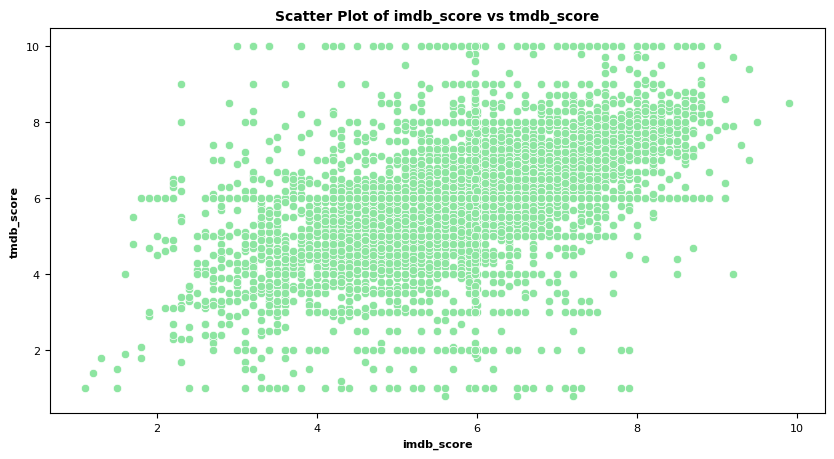

In [ ]:
# Chart - 2 visualization code
# Relation between imdb_score and tmdb_score--> Scatter plot
fig,ax=plt.subplots(figsize=(10,5))
sns.scatterplot(data=df_unique, x='imdb_score', y='tmdb_score',  color=sns.color_palette('pastel')[2],ax=ax)
ax.set_title('Scatter Plot of imdb_score vs tmdb_score', fontdict={'fontsize': 10, 'fontweight': 'bold'})
ax.set_xlabel('imdb_score', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax.set_ylabel('tmdb_score', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is useful here because it helps visualize the relationship between two continuous variables — IMDb and TMDB scores. By plotting each movie’s scores on a 2D graph, we can easily observe whether a pattern or correlation exists between the two platforms. For instance, if higher IMDb scores generally align with higher TMDB scores, it indicates consistency in audience ratings. This visual approach makes it easier to identify trends, similarities, or discrepancies in how content is rated across both platforms.









##### 2. What is/are the insight(s) found from the chart?

1. Seeing a positive correlation between IMDb and TMDB scores means that movies rated highly on one platform tend to be rated highly on the other as well.
2. People who rate movies on IMDb and TMDB mostly think alike about which movies are good or bad. This means that viewers on both websites have similar opinions and use similar ideas when giving scores to movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. If ratings are aligned, businesses don’t need to analyze both platforms separately. They can use just one as a reliable signal for audience approval, saving time and effort.
2. For platforms that suggest content to users (like Amazon Prime), knowing that IMDb and TMDB scores move together means they can create more accurate recommendation systems, using either or both sources.



#### Chart - 3 Content by Ratings and Audience Votes

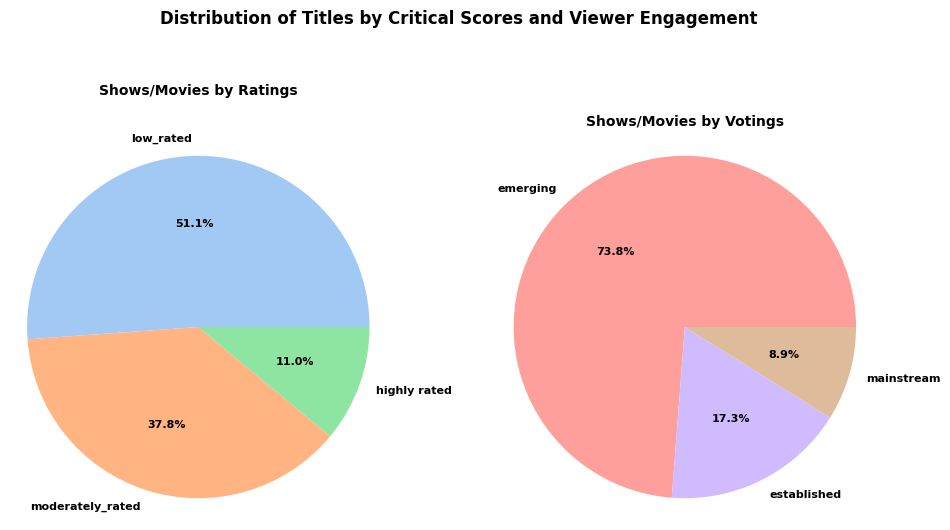

In [27]:
# Chart - 3 visualization code
fig,ax=plt.subplots(1,2, figsize=(10,5))
score_counts=df_unique['imdb_score_category'].value_counts()
vote_counts=df_unique['imdb_votes_category'].value_counts()

# Get colors from the same palette
palette = sns.color_palette('pastel', n_colors=6)  # total 6 colors to use across both

# Use first 3 colors for score, next 3 for votes
colors_score = palette[:len(score_counts)]
colors_votes = palette[-len(vote_counts):]



# Pie chart to show proportion of highly rated movies: moderately rated movies: low rated movies based on imdb_score

ax[0].pie(score_counts.values, labels=score_counts.index, autopct="%1.1f%%", labeldistance=1.1, colors=colors_score, textprops={'fontsize': 8, 'fontweight':'bold'})
ax[0].set_title('Shows/Movies by Ratings', fontdict={'fontsize': 10, 'fontweight': 'bold'}, y=1.08)
ax[0].axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.tight_layout()

# pie chart to show proportion of mainstream(highly voted) movies: established(moderately voted) : emerging(low votes)

ax[1].pie(vote_counts.values, labels=vote_counts.index, autopct="%1.1f%%", labeldistance=1.1, colors=colors_votes, textprops={'fontsize': 8, 'fontweight':'bold'})
ax[1].set_title('Shows/Movies by Votings',  fontdict={'fontsize': 10, 'fontweight': 'bold'})
ax[1].axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

fig.subplots_adjust(wspace=2.5)

plt.suptitle("Distribution of Titles by Critical Scores and Viewer Engagement",
             fontsize=12, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

Pie charts effectively illustrate how each category contributes to the whole, allowing for a clear comparison of the proportion of low-, moderate-, and high-rated movies, as well as the distribution of movies based on user voting levels.

##### 2. What is/are the insight(s) found from the chart?

1. **Most content is both low-rated and under-watched:** A large portion of movies (51%) are low-rated, and an even larger share (74%) are in the "emerging" category (low number of votes).This indicates a large volume of low-engagement, low-quality content, possibly leading to user dissatisfaction or decision fatigue when browsing.

2. **High-quality content lacks visibility:** Only 11% of movies are highly rated, and just 9% are mainstream in terms of votes.There may be valuable content that isn’t reaching users effectively, suggesting the need for better discovery and promotion strategies.

3. **Popularity doesn’t guarantee quality — and vice versa:** The charts hint at a misalignment between audience votes and ratings: some highly voted content may not be highly rated, and some high-rated content may be under-voted.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. The dominance of low-rated, under-watched content suggests a cluttered catalog with low engagement potential.This can lead to decision fatigue, where users struggle to find appealing content, potentially resulting in reduced watch time or churn.
2. The small share of highly rated and mainstream content indicates that some valuable titles aren't getting the visibility they deserve.This suggests a need for stronger content curation, personalized recommendations, or targeted promotion to improve user satisfaction and platform engagement.
3. There is a disconnect between  Quality and Popularity. A more balanced algorithm, factoring in both quality and engagement, could improve content discovery and user retention.

#### Chart - 4 Which Genres Dominate and Which Perform Best?

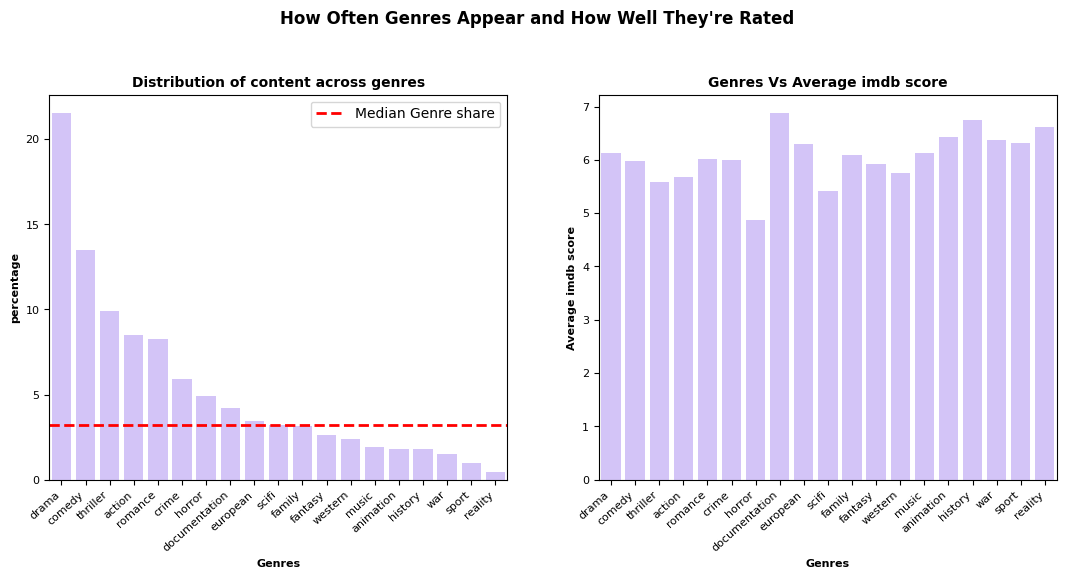

In [56]:
# Chart - 4 visualization code

fig,ax=plt.subplots(1,2, figsize=(13,5), gridspec_kw={'wspace': 0.2})
# distibution of content by genres
genre_count=df.groupby("genres")['id'].nunique()
genre_percent=(genre_count/genre_count.sum())*100
genre_percent=genre_percent.reset_index().sort_values(by='id', ascending=False)
sns.barplot(data=genre_percent, x='genres', y='id', ax=ax[0], color=sns.color_palette("pastel")[4])
ax[0].set_title('Distribution of content across genres', fontdict={'fontsize': 10, 'fontweight': 'bold'})
ax[0].set_xlabel('Genres', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[0].set_ylabel('percentage', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[0].axhline(y= genre_percent['id'].median(), color='red', linestyle='--', linewidth=2, label='Median Genre share')
ax[0].legend(loc='upper right')
ax[0].tick_params(axis='x', labelsize=8, rotation=42)
ax[0].tick_params(axis='y', labelsize=8)
ax[0].set_xticklabels(labels=genre_percent['genres'], ha='right')


# genre vs avg imdb_score
# In my df if i directly group by genre then there might be a case where multiple rows refers to same movie.
# So in order to calculate correct avg_imdb_rating we need to drop duplicate rows with subset=(id,genre) so that each movie is counted once for calculating average.
genre_df=df.drop_duplicates(subset=['id', 'genres'])
genre_df=genre_df.groupby('genres')['imdb_score'].mean().reset_index()
genre_order=genre_percent['genres'].tolist() # to maintain same order of genres in both the bar plots.
sns.barplot(data=genre_df, x='genres', y='imdb_score', ax=ax[1], order=genre_order, color=sns.color_palette("pastel")[4])
ax[1].set_title('Genres Vs Average imdb score', fontdict={'fontsize': 10, 'fontweight': 'bold'})
ax[1].set_xlabel('Genres', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[1].set_ylabel('Average imdb score', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[1].tick_params(axis='x', labelsize=8, rotation=42)
ax[1].tick_params(axis='y', labelsize=8)
ax[1].set_xticklabels(labels=genre_percent['genres'], ha='right')

plt.suptitle("How Often Genres Appear and How Well They're Rated",
             fontsize=12, fontweight='bold', y=1.05)




plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

1. Bar plots make it easy to compare values across different genres — whether it’s how many movies each genre has or how well they’re rated. The length of the bars clearly shows which genres rank higher or lower.

2. Since genres are categorical (Drama, Comedy, etc.), bar plots are perfect for showing how values (like average ratings or percentages) vary by each category.

3. You can use bar plots to add helpful reference lines (like the median) to highlight which genres are above or below average.



##### 2. What is/are the insight(s) found from the chart?

1. **Catalogue Concentration:** Almost half of the library is packed into just three genres (Drama, Comedy, Thriller) which causes viewers seeing the same genre mix repeatedly.

2. **Mid-tier Genres Are Underserved but Viable:** Genres like Action, Romance, Crime, and Horror make up a decent portion of the content — not the biggest share, but still important. They’re in the middle range, contributing between 5% and 10% each. This means they’re popular enough to matter, but not as common as top genres like Drama or Comedy.

3. **Low-presence (“Long-tail”) Genres Hold Niche Value:** Although their share is small, niche genres can attract loyal micro-audiences or meet regional taste profiles.

4. **Genre ≠ Quality Driver:** Average IMDb ratings are remarkably similar across all genres (≈ 5–10).perceived quality is not genre-dependent on this platform; factors like cast, production values, or marketing might matter more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. You can make your platform better by showing more movies and shows from less common genres. This means getting different kinds of content and recommending a wider mix to users, instead of repeating the same popular genres. It helps keep the content fresh and interesting, so people don’t get bored seeing the same types of movies over and over.

2. You can stand out from competitors by promoting specific genres like Action or Romance more directly, or by creating your own original content in these areas. This helps make your platform feel different and unique without filling it with too much of the same popular genres (like Drama or Comedy), which are already very common.

3. You can show these less popular genres (like sci-fi or fanatasy) to the right viewers by using personalized recommendations or themed collections (like “Hidden Gems” or “Chill Thrillers”). This way, you keep people interested and engaged with your platform without spending a lot of money on ads or promotions.

In [58]:
def wraptext(text, width=20):
  return '\n'.join(textwrap.wrap(text,width))

#### Chart - 5  Genres Across Performance Quadrants

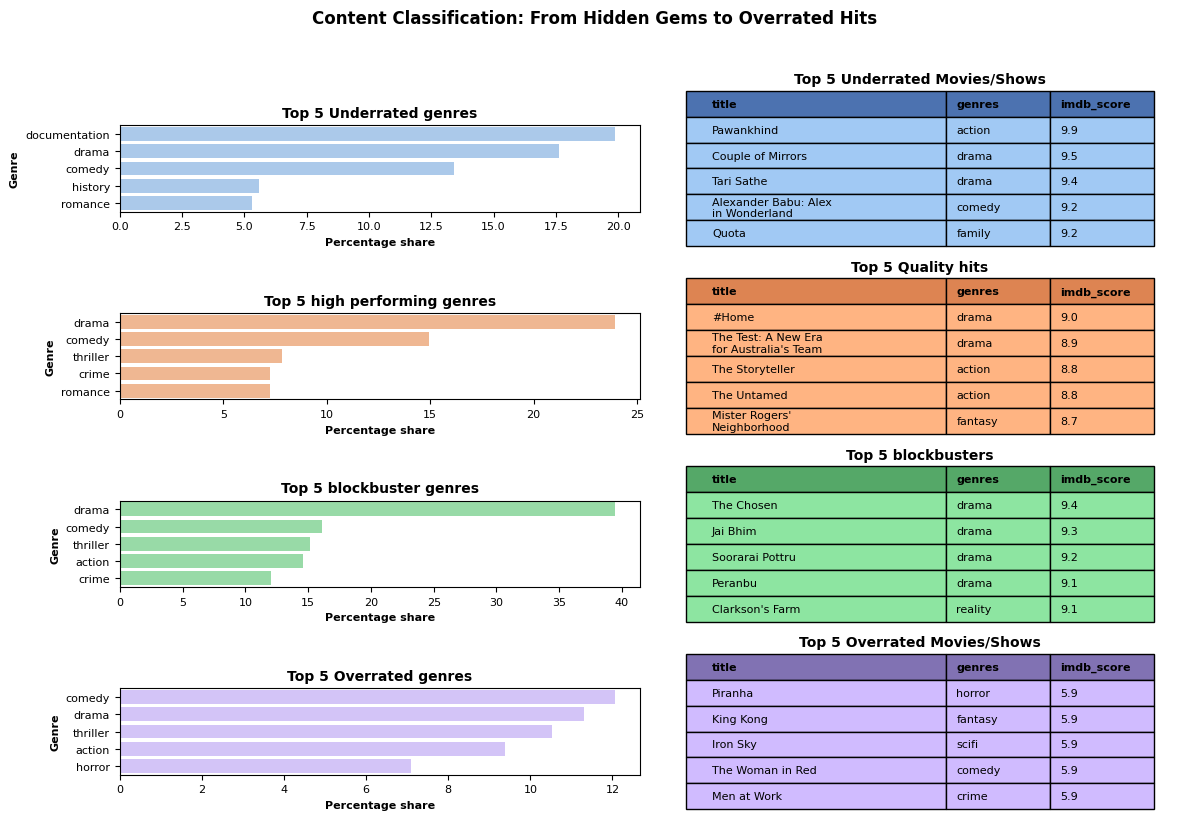

In [68]:
# Chart - 5 visualization code
fig,ax=plt.subplots(4,2, figsize=(12,8))


# Underated content analysis

condition= (df['imdb_score_category']=='highly rated') & (df['imdb_votes_category']=='emerging')
df_underrated_count=df[condition].groupby('genres')['id'].nunique()
df_underrated_percentage=(df_underrated_count/df_underrated_count.sum())*100
df_underrated_percentage=df_underrated_percentage.reset_index()
df_underrated_percentage.sort_values(by='id', ascending=False, inplace=True, ignore_index=True)
df_underrated_percentage=df_underrated_percentage.head(5)

df_movies=df[condition]
df_movies.drop_duplicates(subset='id', inplace=True)
df_movies.sort_values(by='imdb_score', ascending=False, inplace=True, ignore_index=True)
df_movies=df_movies[[ 'title', 'genres', 'imdb_score']].head(5)
df_movies['title']=df_movies['title'].apply(wraptext)

sns.barplot(data=df_underrated_percentage, y='genres', x='id', ax=ax[0,0], color=sns.color_palette("pastel")[0])
ax[0,0].set_title('Top 5 Underrated genres', fontdict={'fontsize': 10, 'fontweight': 'bold'})
ax[0,0].set_xlabel('Percentage share', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[0,0].set_ylabel('Genre', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[0,0].tick_params(axis='x', labelsize=8)
ax[0,0].tick_params(axis='y', labelsize=8)

table_data=[df_movies.columns.tolist()]+df_movies.values.tolist()
table = ax[0,1].table(cellText=table_data, loc='center', cellLoc='left', colLabels=None)
ax[0,1].axis('off')
ax[0,1].text(0.5, 1.45, 'Top 5 Underrated Movies/Shows', ha='center', va='bottom', fontsize=10, fontweight='bold', transform=ax[0,1].transAxes)
table.auto_set_font_size(False)
table.set_fontsize(8)
for key, cell in table.get_celld().items():
    cell.set_height(0.3)
    if key[0] == 0:  # Header row
        cell.set_text_props(weight='bold')
        cell.set_facecolor(sns.color_palette('deep')[0])
    else:
        cell.set_facecolor(sns.color_palette("pastel")[0])

    if key[1] == 0:  # First column (Title)
        cell.set_width(0.5)  # Wider column for title
    else:
        cell.set_width(0.2)


# top performing content analysis
condition= (df['imdb_score_category']=='highly rated') & (df['imdb_votes_category']=='established')
df_top_performing_count=df[condition].groupby('genres')['id'].nunique()
df_top_performing_percentage=(df_top_performing_count/df_top_performing_count.sum())*100
df_top_performing_percentage=df_top_performing_percentage.reset_index()
df_top_performing_percentage.sort_values(by='id', ascending=False, inplace=True, ignore_index=True)
df_top_performing_percentage=df_top_performing_percentage.head(5)

df_movies=df[condition]
df_movies.drop_duplicates(subset='id', inplace=True)
df_movies.sort_values(by='imdb_score', ascending=False, inplace=True, ignore_index=True)
df_movies=df_movies[[ 'title', 'genres', 'imdb_score']].head(5)
df_movies['title']=df_movies['title'].apply(wraptext)

sns.barplot(data=df_top_performing_percentage, y='genres', x='id', ax=ax[1,0], color=sns.color_palette("pastel")[1])
ax[1,0].set_title('Top 5 high performing genres', fontdict={'fontsize': 10, 'fontweight': 'bold'})
ax[1,0].set_xlabel('Percentage share', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[1,0].set_ylabel('Genre', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[1,0].tick_params(axis='x', labelsize=8)
ax[1,0].tick_params(axis='y', labelsize=8)

table_data=[df_movies.columns.tolist()]+df_movies.values.tolist()
table = ax[1,1].table(cellText=table_data, loc='center', cellLoc='left', colLabels=None)
ax[1,1].axis('off')
ax[1,1].text(0.5, 1.45, 'Top 5 Quality hits', ha='center', va='bottom', fontsize=10, fontweight='bold', transform=ax[1,1].transAxes)
table.auto_set_font_size(False)
table.set_fontsize(8)
for key, cell in table.get_celld().items():
    cell.set_height(0.3)
    if key[0] == 0:  # Header row
        cell.set_text_props(weight='bold')
        cell.set_facecolor(sns.color_palette('deep')[1])
    else:
        cell.set_facecolor(sns.color_palette("pastel")[1])
    if key[1] == 0:  # First column (Title)
        cell.set_width(0.5)  # Wider column for title
    else:
        cell.set_width(0.2)

# blockbuster content analysis
condition= (df['imdb_score_category']=='highly rated') & (df['imdb_votes_category']=='mainstream')
df_blockbuster_count=df[condition].groupby('genres')['id'].nunique()
df_blockbuster_percentage=(df_blockbuster_count/df_top_performing_count.sum())*100
df_blockbuster_percentage=df_blockbuster_percentage.reset_index()
df_blockbuster_percentage.sort_values(by='id', ascending=False, inplace=True, ignore_index=True)
df_blockbuster_percentage=df_blockbuster_percentage.head(5)

df_movies=df[condition]
df_movies.drop_duplicates(subset='id', inplace=True)
df_movies.sort_values(by='imdb_score', ascending=False, inplace=True, ignore_index=True)
df_movies=df_movies[[ 'title', 'genres', 'imdb_score']].head(5)
df_movies['title']=df_movies['title'].apply(wraptext)

sns.barplot(data=df_blockbuster_percentage, y='genres', x='id', ax=ax[2,0], color=sns.color_palette("pastel")[2])
ax[2,0].set_title('Top 5 blockbuster genres', fontdict={'fontsize': 10, 'fontweight': 'bold'})
ax[2,0].set_xlabel('Percentage share', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[2,0].set_ylabel('Genre', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[2,0].tick_params(axis='x', labelsize=8)
ax[2,0].tick_params(axis='y', labelsize=8)

table_data=[df_movies.columns.tolist()]+df_movies.values.tolist()
table = ax[2,1].table(cellText=table_data, loc='center', cellLoc='left', colLabels=None)
ax[2,1].axis('off')
ax[2,1].text(0.5, 1.45, 'Top 5 blockbusters', ha='center', va='bottom', fontsize=10, fontweight='bold', transform=ax[2,1].transAxes)
table.auto_set_font_size(False)
table.set_fontsize(8)
for key, cell in table.get_celld().items():
    cell.set_height(0.3)
    if key[0] == 0:  # Header row
        cell.set_text_props(weight='bold')
        cell.set_facecolor(sns.color_palette('deep')[2])
    else:
        cell.set_facecolor(sns.color_palette("pastel")[2])

    if key[1] == 0:  # First column (Title)
        cell.set_width(0.5)  # Wider column for title
    else:
        cell.set_width(0.2)

# Overrated content analysis
condition= (df['imdb_score_category']=='low_rated') & (df['imdb_votes_category']=='mainstream')
df_overrated_count=df[condition].groupby('genres')['id'].nunique()
df_overrated_percentage=(df_overrated_count/df_top_performing_count.sum())*100
df_overrated_percentage=df_overrated_percentage.reset_index()
df_overrated_percentage.sort_values(by='id', ascending=False, inplace=True, ignore_index=True)
df_overrated_percentage=df_overrated_percentage.head(5)

df_movies=df[condition]
df_movies.drop_duplicates(subset='id', inplace=True)
df_movies.sort_values(by='imdb_score', ascending=False, inplace=True, ignore_index=True)
df_movies=df_movies[[ 'title', 'genres', 'imdb_score']].head(5)
df_movies['title']=df_movies['title'].apply(wraptext)

sns.barplot(data=df_overrated_percentage, y='genres', x='id', ax=ax[3,0], color=sns.color_palette("pastel")[4])
ax[3,0].set_title('Top 5 Overrated genres', fontdict={'fontsize': 10, 'fontweight': 'bold'})
ax[3,0].set_xlabel('Percentage share', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[3,0].set_ylabel('Genre', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[3,0].tick_params(axis='x', labelsize=8)
ax[3,0].tick_params(axis='y', labelsize=8)

table_data=[df_movies.columns.tolist()]+df_movies.values.tolist()
table = ax[3,1].table(cellText=table_data, loc='center', cellLoc='left', colLabels=None)
ax[3,1].axis('off')
ax[3,1].text(0.5, 1.45, 'Top 5 Overrated Movies/Shows', ha='center', va='bottom', fontsize=10, fontweight='bold', transform=ax[3,1].transAxes)
table.auto_set_font_size(False)
table.set_fontsize(8)
for key, cell in table.get_celld().items():
    cell.set_height(0.3)
    if key[0] == 0:  # Header row
        cell.set_text_props(weight='bold')
        cell.set_facecolor(sns.color_palette('deep')[4])
    else:
        cell.set_facecolor(sns.color_palette("pastel")[4])
    if key[1] == 0:  # First column (Title)
        cell.set_width(0.5)  # Wider column for title
    else:
        cell.set_width(0.2)




plt.suptitle("Content Classification: From Hidden Gems to Overrated Hits",
             fontsize=12, fontweight='bold', y=1.02)

fig.subplots_adjust(hspace=1.3, wspace=0.4, top=0.95)

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

1. Genre names can be long (like Documentary or Romance). Horizontal bars give more space to read them clearly.

2.  It’s easier to compare percentages or counts side by side when the bars go across.

3.  Tables make your insights look more organized and easy to follow, especially when listing movie data.

##### 2. What is/are the insight(s) found from the chart?

1. **Comedy is the Most Flexible Genre:** Comedy shows up in all types of content — from underrated gems to overrated hits.  This means lots of people like comedy, but not all comedy movies are the same quality. Some are hidden treasures that not many people know about, while others might be talked about a lot but aren’t actually that good.

2. **Drama is the foundation genre:** Drama shows up in every group and is the biggest part of blockbuster group (40%). That means drama is a strong and reliable genre. It often gets good reviews and a lot of views. So if a streaming platform wants to make something popular or respected, drama is usually a safe and smart choice.

3.  **Documentary is critically valued but underrepresented overall:** Documentaries are often really good and get high ratings, but not many people watch them. They're number one in the underrated group (20%), which means they deserve more attention than they get. So, they’re strong in quality but not very popular with large audiences.

4. **Thriller, Action, and Crime thrive commercially — but risk quality trade-offs:** Genres like Thriller, Action, and Crime are very popular — they make up a big part of blockbuster movies that get lots of views and high ratings. This means they do well commercially.But when we look at top-performing (high quality) or underrated (high quality but less watched) movies, these genres are not as common. Instead, they appear more in the overrated group — movies with high views but low ratings.This suggests that while these genres attract big audiences, not all of the content is strong in quality. Some movies might become popular because of marketing, stars, or trends, even if they’re not very good.

5.  **Romance--> Quietly strong in quality:** Romance doesn’t show up much in big blockbuster hits or overrated movies but it does appear in underrated and top-performing content, meaning when romance movies are made, they’re often well-rated and good in quality, even if they don’t get huge attention. Romance may not be the most popular, but it often wins over viewers with strong storytelling and emotion. It’s a reliable genre for platforms that want quality content with a loyal audience.

6. **Horror only appears in overrated:** Horror movies don’t show up in the top-performing or underrated groups — the ones that are really good or hidden gems.But they do appear in the overrated group, meaning they might get a lot of attention or hype, but the quality isn’t always there.Horror often attracts viewers, but many films don’t live up to the buzz — it's a risky genre in terms of consistent quality.












##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 1. **Comedy--> The Flexible Crowd-Pleaser:**


  *   Comedy’s broad appeal means it attracts a wide audience, so investing in comedy content can help grow and maintain a large viewer base.
  *   However, because comedy varies in quality, platforms should carefully curate or promote higher-quality comedy to build long-term subscriber trust and satisfaction.
  * Business action: Use data and reviews to highlight the best comedy content, and avoid flooding the platform with low-quality comedy just to fill slots.

2. **Drama--> The Reliable Foundation:**


  *   Drama’s consistent presence in top and blockbuster categories makes it a safe investment for both critical acclaim and commercial success.
  * Platforms aiming to build prestige or attract serious viewers should prioritize drama projects, as these tend to engage loyal, quality-seeking audiences.
  * Business action: Allocate resources to develop and promote original drama series or films for steady subscriber growth and retention.

3. **Documentary--> Hidden Gems with Growth Potential:**


  *   Documentaries have strong critical value but smaller audiences, indicating a niche but passionate market.
  *   Platforms can differentiate themselves by spotlighting quality documentaries, appealing to educated and engaged viewers who seek meaningful content.
  * Business action: Promote documentaries as “must-watch” or award-winning to raise their profile and attract a dedicated audience willing to pay for unique content.

4. **Thriller, Action, Crime--> Commercial Blockbusters with Quality Risks:**


  *   These genres drive high viewership and revenue but come with inconsistent quality, sometimes relying on hype rather than substance.
  *  Relying too heavily on these genres risks subscriber dissatisfaction if expectations aren’t met.
  * Business action: Balance quantity with quality control — invest in high-quality projects but be cautious of over-saturating the platform with lower-quality, hype-driven titles.


5. **Romance--> Quality Niche with Loyal Fans:**


  *   Romance appeals to a loyal, quality-focused audience even if it doesn’t drive blockbuster numbers.
  *   This genre can build a steady base of subscribers who value strong storytelling and emotional content.

  * Business action: Use romance as a niche strategy to retain a specific segment of subscribers, complementing the bigger blockbuster and mass-appeal genres.

6. **Horror--> Risky Genre Needing Careful Curation:**


  *   Horror’s heavy presence in overrated content suggests that many titles fail to meet quality expectations despite generating hype.

  *   Poor quality could harm platform reputation among horror fans.
  *   Business action: Be selective with horror acquisitions; focus on innovative, critically well-received horror to avoid alienating viewers and maintain credibility.





























  










   





#### Chart - 6 Content Share and IMDb Ratings by Production Country

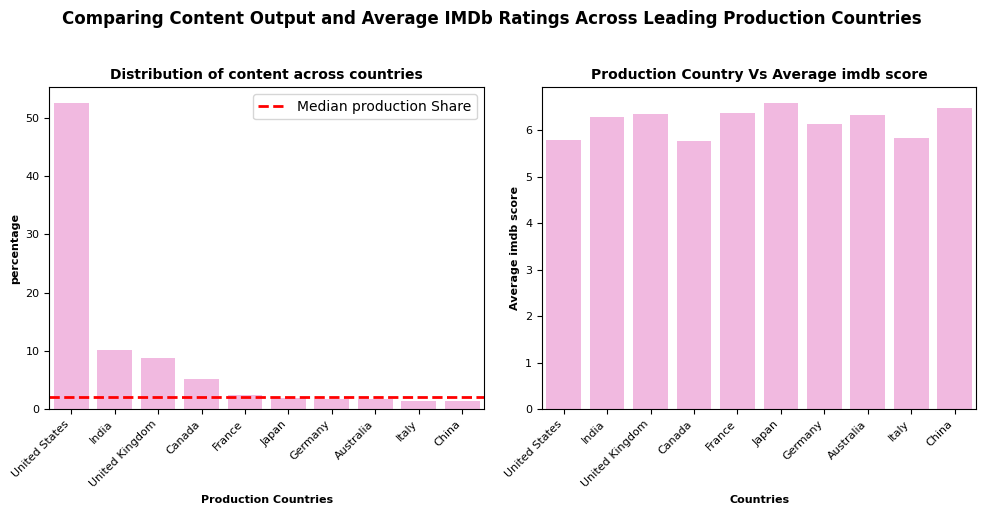

In [73]:
# Chart - 6 visualization code

country_code_to_full_name = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'IN': 'India',
    'CA': 'Canada',
    'FR': 'France',
    'DE': 'Germany',
    'JP': 'Japan',
    'AU': 'Australia',
    'CN': 'China',
    'IT': 'Italy',
}


fig,ax=plt.subplots(1,2, figsize=(10,5))
# distibution of content by production_countries
region_count=df.groupby("production_countries")['id'].nunique()
region_percent=(region_count/region_count.sum())*100
region_percent=region_percent.reset_index().sort_values(by='id', ascending=False)
region_percent=region_percent.head(10) # Considering top 10 production_countries for analysis
country_labels=[country_code_to_full_name[code] for code in region_percent['production_countries']]
sns.barplot(data=region_percent, x='production_countries', y='id', ax=ax[0], color=sns.color_palette("pastel")[6])
ax[0].set_title('Distribution of content across countries', fontdict={'fontsize': 10, 'fontweight': 'bold'})
ax[0].set_xlabel('Production Countries', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[0].set_ylabel('percentage', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[0].axhline(y= region_percent['id'].median(), color='red', linestyle='--', linewidth=2, label='Median production Share')
ax[0].legend(loc='upper right')
ax[0].tick_params(axis='x', labelsize=8, rotation=90)
ax[0].tick_params(axis='y', labelsize=8)
ax[0].set_xticks(region_percent['production_countries']) # fixed Locator
ax[0].set_xticklabels(country_labels, rotation=45, ha='right');


# production_countries vs avg imdb_score
# In my df if i directly group by production_countries then there might be cases where multiple rows refers to same movie.
# So in order to calculate correct avg_imdb_rating we need to drop duplicate rows with subset=(id,production_countries) so that each movie is counted once for calculating average.
region_df=df.drop_duplicates(subset=['id', 'production_countries'])
region_df=region_df.groupby('production_countries')['imdb_score'].mean().reset_index()
region_order=region_percent['production_countries'].tolist() # to maintain same order of countries in both the bar plots.
sns.barplot(data=region_df, x='production_countries', y='imdb_score', ax=ax[1], order=region_order, color=sns.color_palette("pastel")[6])
ax[1].set_title('Production Country Vs Average imdb score', fontdict={'fontsize': 10, 'fontweight': 'bold'})
ax[1].set_xlabel('Countries', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[1].set_ylabel('Average imdb score', fontdict={'fontsize': 8, 'fontweight': 'bold'})
ax[1].tick_params(axis='x', labelsize=8, rotation=90)
ax[1].tick_params(axis='y', labelsize=8)
ax[1].set_xticks(region_percent['production_countries']) # fixed Locator
ax[1].set_xticklabels(country_labels, rotation=45, ha='right');


plt.suptitle(
    "Comparing Content Output and Average IMDb Ratings Across Leading Production Countries",
    fontsize=12,
    fontweight='bold',
    y=1.02
)

plt.tight_layout()
plt.show()





##### 1. Why did you pick the specific chart?

1. Bar charts are ideal for comparing discrete categories like countries.

2. Horizontal or rotated x-axis labels make country names readable, even when long.

3. Bar charts make it easy to show which countries are above or below average visually.

##### 2. What is/are the insight(s) found from the chart?

1. **Over 50% of content is from the U.S**.
→ The catalog is heavily dominated by U.S. productions, which can lead to repetitive viewing experiences if not balanced with global content.

2. **India, UK, and Canada contribute 5–10% each**
→ These countries have strong regional markets and global appeal, making them ideal for targeted growth and investment.

3. **Other countries contribute less than the median share**
→ Countries like France, Germany, and Japan produce less content but may still offer high-quality titles that deserve better promotion.

4. **All countries have similar average IMDb scores**
→ Good content comes from everywhere — quality is consistent across regions, so platform strategy should focus on discovering and highlighting gems from all over the world.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. **Don’t rely only on U.S. content**
→ Add more shows and movies from other countries to give viewers more variety and keep them interested.

2. **Invest more in India, UK, and Canada**
→ These countries already do well and have room to grow — making more content there can bring more viewers.

3. **Promote hidden gems from smaller countries**
→ Some great content from places like France or Japan is getting ignored — highlight these to surprise and impress users.

4. **Use IMDb ratings to find good content from anywhere**
→ Since all countries have similar ratings, focus on promoting well-rated content no matter where it comes from.

5. **Avoid flooding the platform with just popular genres or countries**
→ Too much of the same type of content can make users bored or stop watching — mix it up for better results.



#### Chart - 7 Genre Preferences Across Top Content-Producing Countries

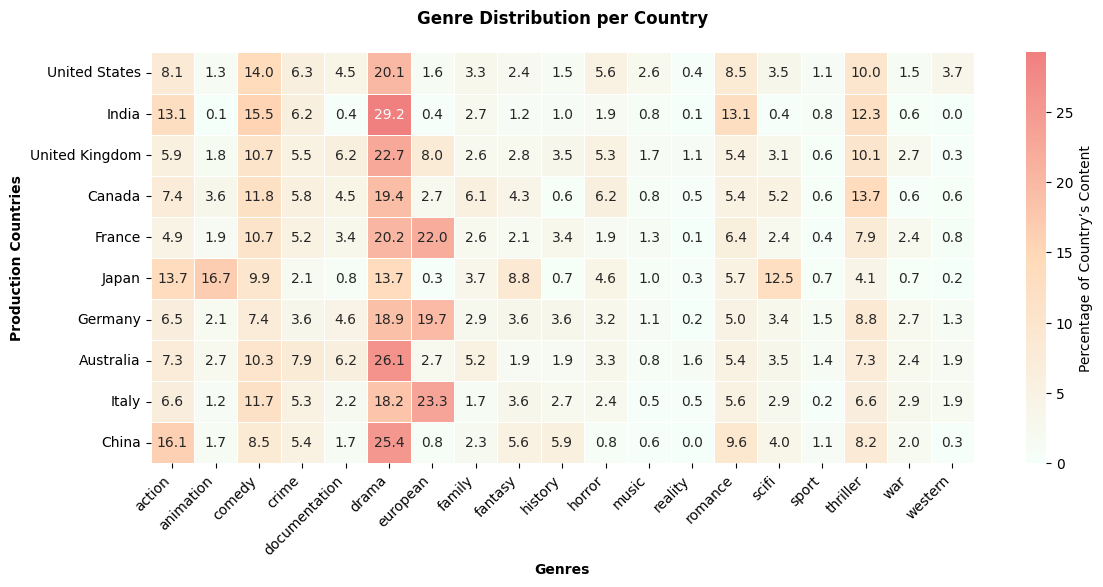

In [74]:
# Chart - 7 visualization code


# eliminating duplicate records
df_unique=df.drop_duplicates(subset=['id', 'genres', 'production_countries'])

top_10_countries=region_percent['production_countries'].tolist()

full_ct= pd.crosstab(df_unique['production_countries'], df_unique['genres'])

# converting actual counts to percentage
full_ct_percent= full_ct.div(full_ct.sum(axis=1), axis=0)*100

# filter top 10 countries
heatmap_data=full_ct_percent.loc[top_10_countries]

# maps country code to their full name
heatmap_data.index=heatmap_data.index.map(country_code_to_full_name)

pastel_gradient = LinearSegmentedColormap.from_list(
     "pastel_share_gradient",
    ["mintcream", "peachpuff", "lightcoral"]
)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap=pastel_gradient, linewidths=0.5, cbar_kws={'label': 'Percentage of Country’s Content'})
plt.title('Genre Distribution per Country', fontsize=12, fontweight='bold', y=1.05)
plt.xlabel('Genres', fontsize=10, fontweight='bold')
plt.ylabel('Production Countries', fontsize=10, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()





##### 1. Why did you pick the specific chart?

 1. Heatmaps are ideal when you want to see how combinations of categories behave — like how much of each genre is produced by each country.

 2. A heatmap allows you to visually encode percentages using color, making it easy to spot which country focuses heavily on certain genres.

 3. With just one chart, you get a matrix-style summary of all genre-country combinations.

##### 2. What is/are the insight(s) found from the chart?

1. Drama is the most common genre across many countries, with India leading at 29%, followed by notable contributions from France, Japan, Germany, and Italy — proving Drama’s wide global appeal.

2. Japan stands out in Animation, Action, and Sci-Fi, reflecting its strength in visually dynamic and futuristic storytelling that resonates with both local and international audiences.

3. European countries like France, Germany, and Italy heavily invest in the European genre, with Italy leading around 23%, showcasing a strong regional identity and traditional storytelling focus.

4. The United States and India offer a balanced content mix, contributing decent shares in Comedy, Action, Romance, and Thriller, which helps them reach a broad and diverse audience.

5. Countries like the UK, Canada, France, Australia, China, and Italy each have their own genre strengths. For example, the UK contributes noticeably to European-style content ~ 8%, France leans toward Comedy ~ 11%, and China stands out in Action ~ 17% and Romance ~ 10%. This shows how each country focuses on genres that match their local audience's taste and culture.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Drama’s wide global appeal means platforms should keep investing in high-quality drama content to attract audiences across many countries — especially focusing on India, where it's most popular.

2. Japan’s strong performance in Animation, Action, and Sci-Fi suggests there's an opportunity to license or co-produce more visually rich and futuristic content from Japan to attract both local and global fans.

3. European countries’ focus on the European genre (especially Italy) shows their strong cultural storytelling — platforms should highlight this content to appeal to viewers interested in traditional or regional narratives.

4. Each country’s unique genre preference (e.g., China with Action and Romance, France with Comedy) can guide personalized content curation and marketing — offering the right genre to the right audience boosts satisfaction and watch time.

5. The US and India make a good mix of different genres like Comedy, Action, Romance, and Thriller. This helps them reach many types of viewers, so platforms should keep making and promoting a variety of content from these countries to keep more people interested and watching.

#### Chart - 8 Understanding Amazon Prime’s Expansion and Content Mix Over the Years

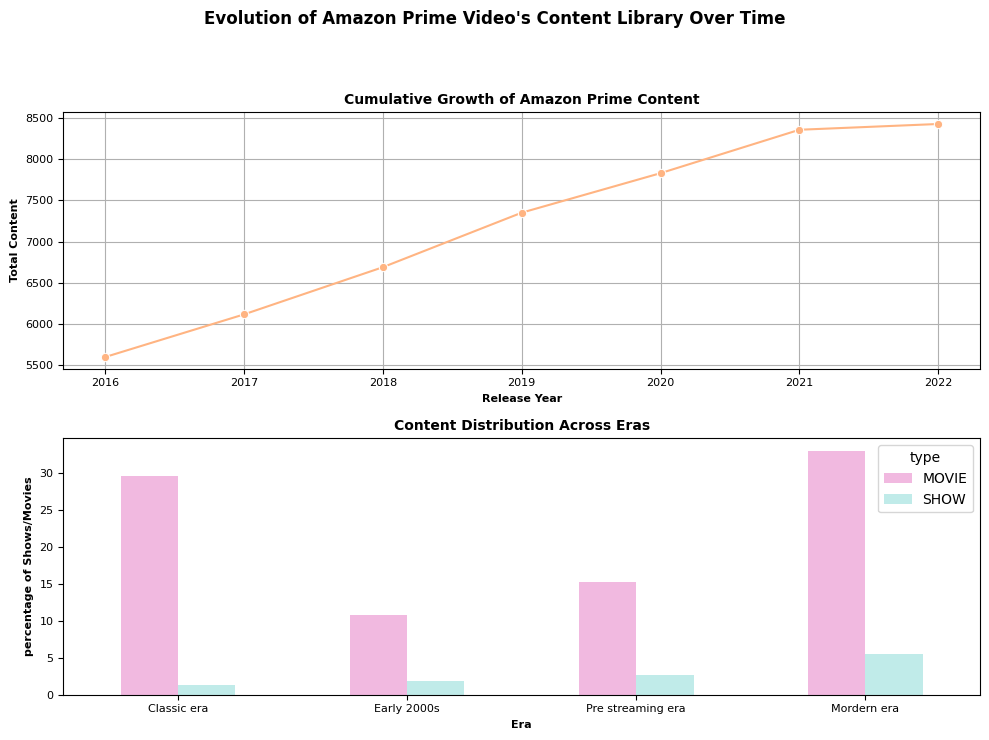

In [84]:
# Chart - 8 visualization code

# To understand how amazon prime library evolved over time i will consider 2 things
# 1. From research found out that prime was launched globally in year 2016.
# 2. For calculations purpose i will assume that all the content released before 2016 was added to prime in the year 2016.
df_new=df.copy()

# replace years before 2016 with 2016 to count content as per assumption.
df_new['release_year']=df_new['release_year'].apply(lambda x:2016 if x < 2016 else x)

yearly_count=df_new.groupby('release_year')['id'].nunique().reset_index()

yearly_count['cummulative_count']= yearly_count['id'].cumsum()


fig,ax=plt.subplots(2,1, figsize=(10,7))

# color for line plot
pastel_color = sns.color_palette("pastel")[1]

# line plot to show content growth over the years
sns.lineplot(data=yearly_count, x='release_year', y='cummulative_count', marker='o', ax=ax[0], color=pastel_color)

ax[0].set_title('Cumulative Growth of Amazon Prime Content', fontsize=10, fontweight='bold')
ax[0].set_xlabel('Release Year', fontsize=8, fontweight='bold')
ax[0].set_ylabel('Total Content', fontsize=8, fontweight='bold')
ax[0].tick_params(axis='x', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)
ax[0].grid(True)


# bar plot to show count of content from each year

# if i plot for every individual year then the overall plot will be too clutterd which is difficult to read.

# creating 4 categories based on release year

# function to create categories

def categorize_years(year):
  if year<2000:
    return 'Classic era'
  elif year>=2000 and year<2010:
    return 'Early 2000s'
  elif year>=2010 and year<2016:
    return 'Pre streaming era'
  else:
    return 'Mordern era'


df['year_categories']= df['release_year'].apply(categorize_years)

yearly_content=df.groupby(['year_categories', 'type'])['id'].nunique().reset_index()
total_count=yearly_content['id'].sum()
yearly_content['percentage']=(yearly_content['id']/total_count)*100

era_order = ['Classic era', 'Early 2000s', 'Pre streaming era', 'Mordern era']

pastel_colors = sns.color_palette("pastel")

sns.barplot(data=yearly_content, x='year_categories', y='percentage', palette=[pastel_colors[6], pastel_colors[9]], ax=ax[1], width=0.5, hue='type', order=era_order)
ax[1].set_title('Content Distribution Across Eras', fontsize=10, fontweight='bold')
ax[1].set_xlabel('Era', fontsize=8, fontweight='bold')
ax[1].set_ylabel('percentage of Shows/Movies', fontsize=8, fontweight='bold')
ax[1].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='y', labelsize=8)

fig.subplots_adjust(hspace=6.5)

fig.suptitle("Evolution of Amazon Prime Video's Content Library Over Time", fontsize=12, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()









##### 1. Why did you pick the specific chart?

1. A line plot is best for showing trends over time.
2. A line makes it easy for viewers to see growth patterns clearly — whether it’s fast, slow, or steady.
3. Using cumulative counts helps visually tell the story of library expansion rather than just yearly fluctuations.
4. A grouped bar plot is perfect for category comparisons within eras (Shows vs Movies).
5. Grouped bars make it easy to compare how much content came from each era.
6. By grouping bars for Shows and Movies side-by-side within each era, you can clearly see how the focus shifted across eras and whether movies or shows dominated in a specific era.

##### 2. What is/are the insight(s) found from the chart?

1. **Movies dominate the platform:**
Almost 90% of Amazon Prime’s total content is movies, with the Modern Era (2016 onwards) contributing the most (about 35%).
2. **Series are a small part of the library:**
Series make up only about 10% of the total content, showing movies are clearly the main focus.
3. **Classic content is still significant:**
The Classic Era (before 2000) contributes about 30% of the movies, showing the platform values older, established content.
4. **Series content is growing over time:**
Even though shows make up a small part of the total content, the number of shows has been increasing in each new era, especially after streaming became more popular. This shows Amazon is slowly putting more focus on adding series over time.
5. **Pre-streaming and early 2000s contribute less:** Movies from the Early 2000s and Pre-streaming Era contribute less, showing Amazon focuses more on older classics and recent releases, not much on mid-2000s movies.
6. **Amazon Prime started big in 2016:** It launched globally with a large library of about 5600 shows/movies already available.

7. **Steady growth from 2016 to 2021:** Every year, more content was added at a consistent and stable pace, showing clear investment in expanding the platform.

8. **Slowdown after 2021:** Between 2021 and 2022, very little new content was added. This flat growth might suggest a shift in strategy (maybe focusing on quality over quantity).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Amazon should continue strengthening its movie library, but also ensure a balance between quantity and quality to maintain user engagement.

2. Since Series are a small part of the library so there is a opportunity to expand into series to boost user retention, as series drive binge-watching behavior and keep subscribers active longer compared to movies.

3.  Keep leveraging classic titles to attract viewers who prefer nostalgic or evergreen content but avoid over-reliance as younger audiences prefer modern content.

4. Steady growth from 2016 to 2021 indicates a solid and stable content acquisition strategy. Amazon should maintain this momentum but focus more on strategic content (genre gaps, regional appeal) rather than just increasing numbers.

5. Slowdown after 2021 suggest that amazon might be focusing more on quality content, original shows, or regional content instead of just adding lots of new stuff. But adding less content could make it harder to compete with platforms like Netflix or Disney+, which keep adding more. Amazon should clearly tell users that they are working on better, not just more, content.

#### Chart - 9 Genre Evolution and Growth

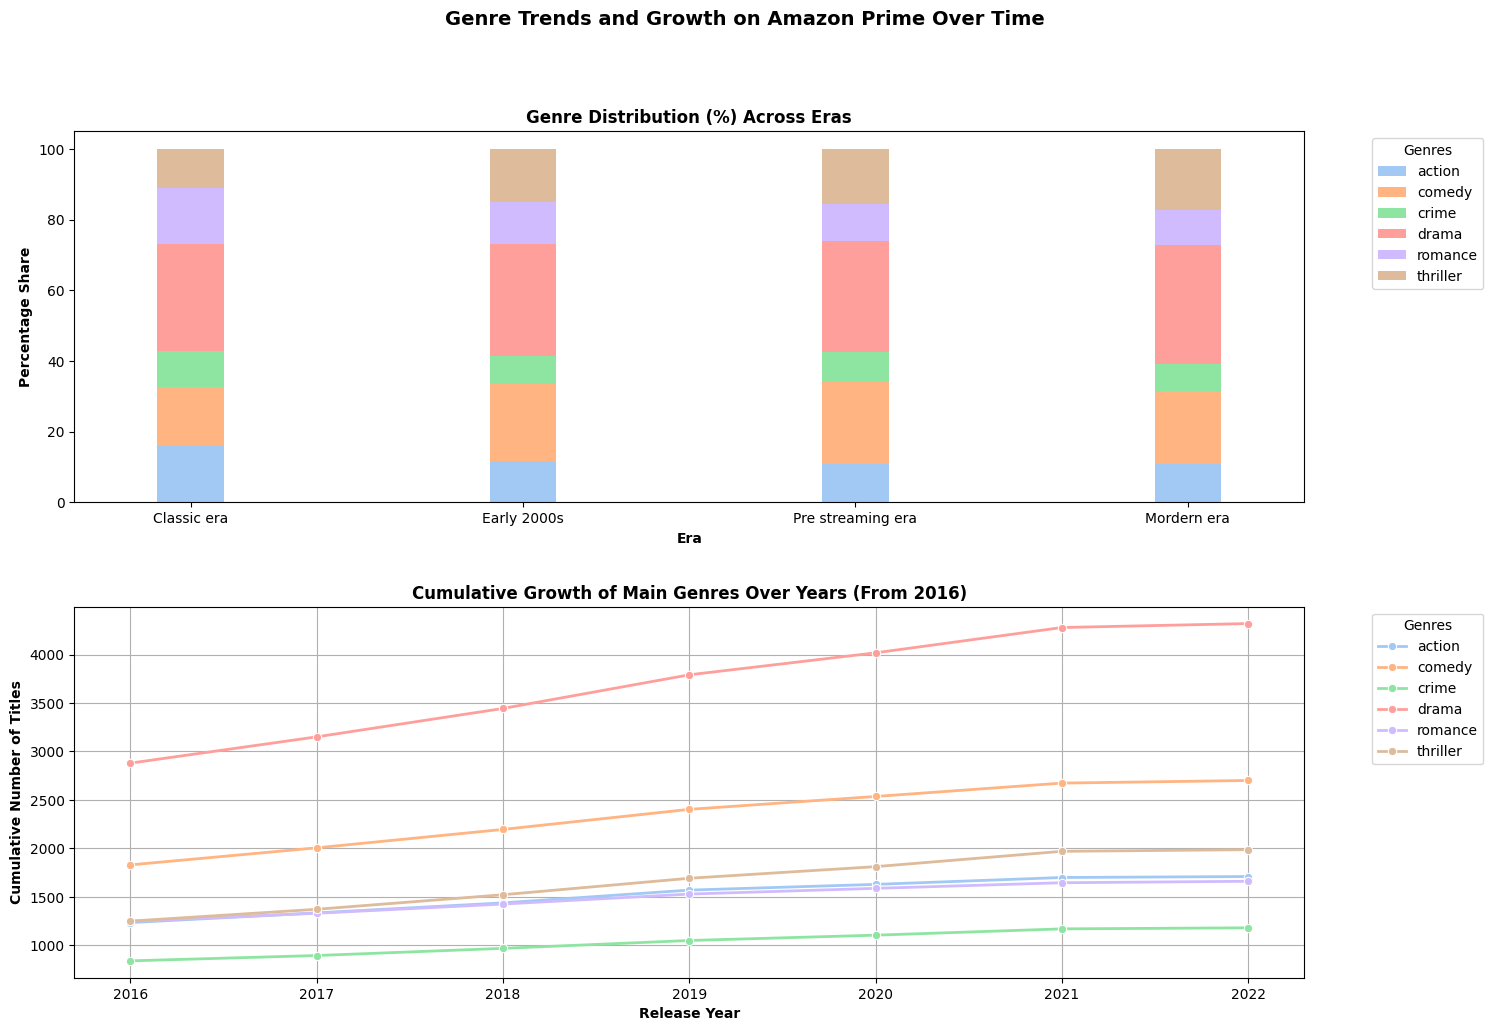

In [94]:
# Chart - 9 visualization code
# genre trends over time

# since there are too many genres so i will focus on important genres only.
# from previous plots found out that drama,comedy, action, thriller,crime and rommance are somehow important than other genres.
# since there are too many years plotting it directly can clutter the graph which is diificult to interpret
# therefore analysing genre distribution over each era
main_genres_list=['drama', 'comedy', 'romance', 'action', 'thriller', 'crime']
df_genres=df[df['genres'].isin(main_genres_list)]
df_genres=df_genres.groupby(['year_categories', 'genres'])['id'].nunique().unstack(fill_value=0)
df_genres=df_genres.div(df_genres.sum(axis=1), axis=0)*100
era_order = ['Classic era', 'Early 2000s', 'Pre streaming era', 'Mordern era']
# Reindex to enforce order
df_genres = df_genres.reindex(era_order)




# analysing cummulative growth for this main genres over the years(from the launch year 2016)
df_genre_growth=df_new[df_new['genres'].isin(main_genres_list)]
df_genre_growth=df_genre_growth.groupby(['release_year', 'genres'])['id'].nunique().reset_index()
df_genre_growth.sort_values(by=['genres','release_year'], inplace=True, ignore_index=True)
df_genre_growth['cummulative_sum']=df_genre_growth.groupby('genres')['id'].cumsum()


pastel_palette = sns.color_palette("pastel")



fig,ax=plt.subplots(2,1, figsize=(15,10))
df_genres.plot(kind='bar', stacked=True,width=0.2, ax=ax[0], color=pastel_palette[:len(df_genres.columns)])
ax[0].set_title('Genre Distribution (%) Across Eras', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Era', fontsize=10, fontweight='bold')
ax[0].set_ylabel('Percentage Share', fontsize=10, fontweight='bold')
ax[0].legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
ax[0].tick_params(axis='x', rotation=0, labelsize=10)
ax[0].tick_params(axis='y', labelsize=10)


sns.lineplot(data=df_genre_growth, x='release_year', y='cummulative_sum', hue='genres', ax=ax[1], marker='o', linewidth=2, palette=pastel_palette[:len(main_genres_list)])
ax[1].set_title('Cumulative Growth of Main Genres Over Years (From 2016)', fontsize=12, fontweight='bold')
ax[1].set_xlabel('Release Year', fontsize=10, fontweight='bold')
ax[1].set_ylabel('Cumulative Number of Titles', fontsize=10, fontweight='bold')
ax[1].legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].grid(True)
ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Genre Trends and Growth on Amazon Prime Over Time", fontsize=14, fontweight='bold', y=1.05)

plt.subplots_adjust(hspace=6.5)


plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

**100% Stacked Bar Chart: Genre Distribution (%) Across Eras**
1. Clearly shows relative proportion of genres within each era.

2. Best suited for comparing compositions within categories (eras).

3. Makes it easy to identify dominant genres per era.

**Cumulative Line Plot: Cumulative Growth of Genres Since 2016**

1. Ideal for showing growth over time.

2.  Cumulative view shows total accumulation of content per genre.

3.  Helps identify which genres expanded steadily post-2016.



##### 2. What is/are the insight(s) found from the chart?

1. **Action, Crime, and Romance:** These genres showed a gradual decline in their percentage share over time. Action fell from ~16% to ~11%, Crime from ~10% to ~7%, and Romance from ~16% to ~10%, suggesting a reduced focus or declining popularity in recent years.

2. **Comedy:** Comedy grew from ~17% in the Classic Era to ~23% in the Pre-Streaming Era but slightly declined to ~21% in the Modern Era, indicating stable but not increasing dominance.

3. **Drama:** Drama consistently remained the most dominant genre, growing from ~30% in the Classic Era to ~34% in the Modern Era, highlighting its strong and sustained audience appeal.

4. **Thriller:** Thriller showed steady and consistent growth from ~11% in the Classic Era to ~17% in the Modern Era, pointing to a rising interest in suspenseful content.

5. Comedy and Drama were core drivers of content growth between 2016 and 2021.
They contributed heavily to library expansion, indicating sustained viewer demand.

6. Action, Crime, and Romance genres showed slow but steady growth from 2016 to 2019, continued at a slower pace from 2019 to 2021, and nearly stagnated after 2021.This gradual slowdown suggests these genres may be nearing saturation on the platform.

7. Thriller shows steady growth but less dominance.
Thriller remains relevant but hasn’t exploded in popularity. It could be a good secondary focus area.

8. Post-2021 slowdown is consistent across genres.
This aligns with previous findings — Amazon may be shifting strategy towards quality, originals, or regional focus rather than bulk additions or may be its because of covid situation during that period.

9. Drama content started as the most dominant genre when Prime launched, ahead of Comedy and others.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. **Prioritize Drama and Comedy:**
Drama and Comedy remain Amazon Prime’s strongest and most reliable genres. Continue investing in these as they show consistent demand and drive long-term engagement.1.

2. **Refresh Action, Crime, and Romance content:**
These genres have shown slowdowns and possible signs of saturation. Rather than adding similar content, Amazon should focus on fresh, innovative narratives or niche sub-genres to revive viewer interest.1.

3. **Leverage Thriller’s Steady Growth:**
Thriller is growing slowly but steadily. Amazon can treat it as a secondary focus area, experimenting with new formats (mini-series, docu-thrillers) or blending it with trending genres.1.

4. **Adapt Content Strategy Post-2021:**
The slowdown after 2021 suggests either a shift towards quality over quantity or external factors like COVID-19. Amazon should clearly communicate this strategic shift to users through marketing — “Better content, not just more content.”



#### Chart - 10 Leading Country-wise Evolution of Content Share and Growth

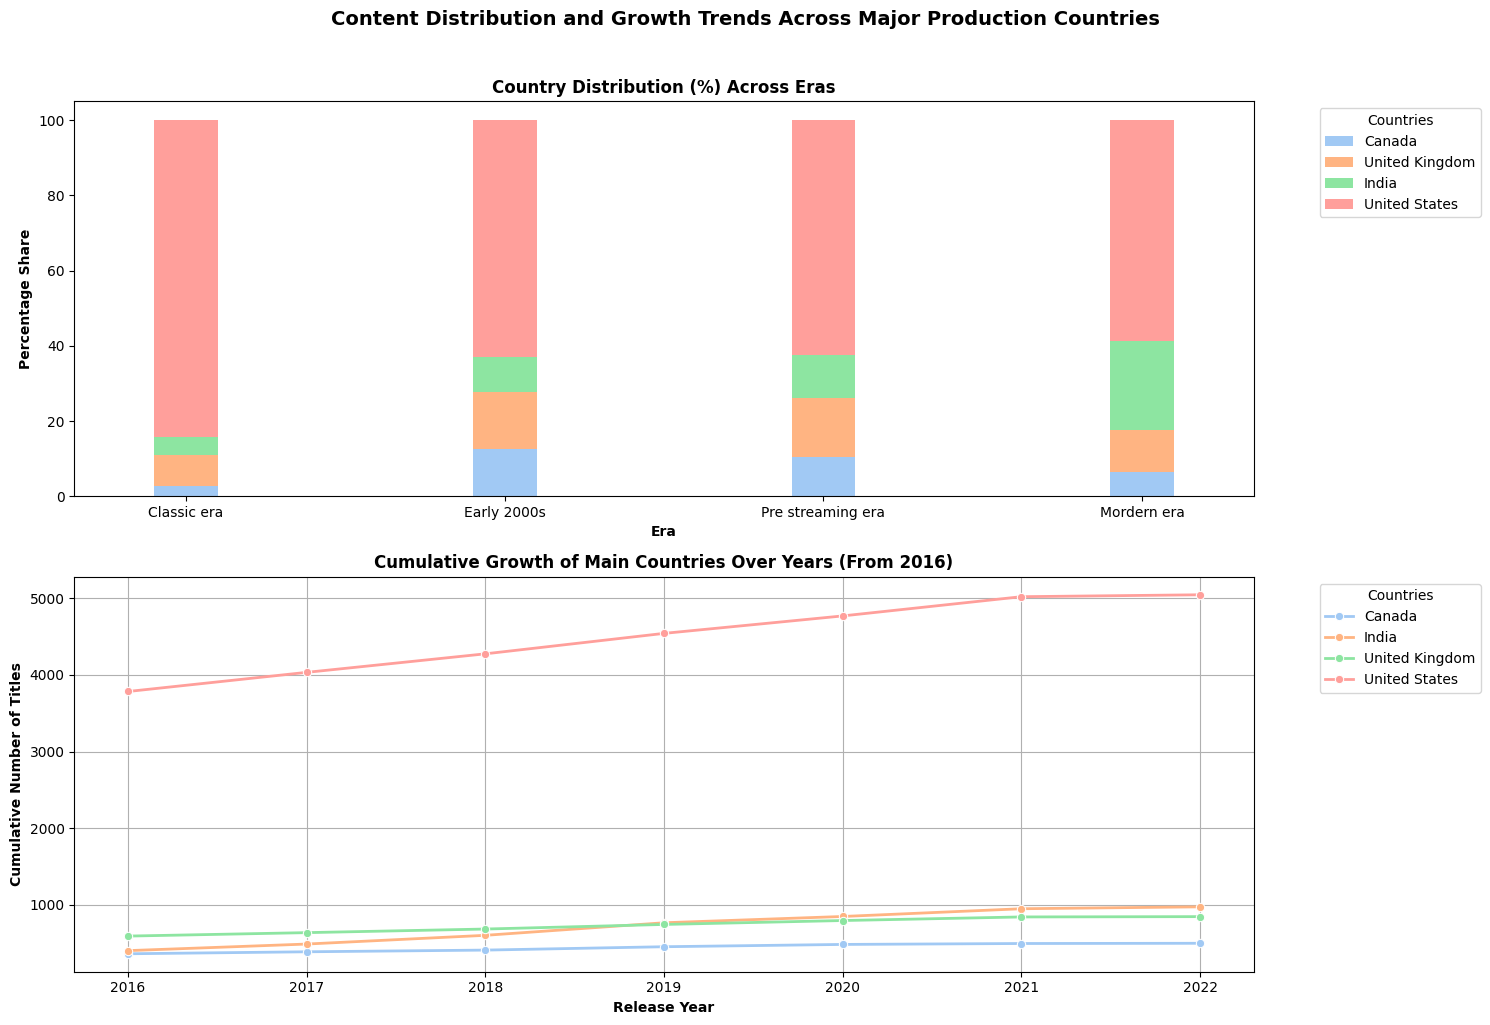

In [96]:
# Chart - 10 visualization code
# countries trends over time

#since there are so many countries i will only consider few of them for better interpretation
# from the distribution of content across countries it can be seen that almost 80% of the content is from US,India,UK,Canada.
#Therefore only considering this countries for analysis.


main_countries_list = ['US', 'IN', 'GB', 'CA']
df_countries = df[df['production_countries'].isin(main_countries_list)]
df_countries = df_countries.groupby(['year_categories', 'production_countries'])['id'].nunique().unstack(fill_value=0)

# Map columns (country codes) to full names here
df_countries.rename(columns=country_code_to_full_name, inplace=True)

df_countries = df_countries.div(df_countries.sum(axis=1), axis=0) * 100
era_order = ['Classic era', 'Early 2000s', 'Pre streaming era', 'Mordern era']
df_countries = df_countries.reindex(era_order)



df_country_growth = df_new[df_new['production_countries'].isin(main_countries_list)]
df_country_growth = df_country_growth.groupby(['release_year', 'production_countries'])['id'].nunique().reset_index()

# Map column values to full names here
df_country_growth['production_countries'] = df_country_growth['production_countries'].map(country_code_to_full_name)

df_country_growth.sort_values(by=['production_countries', 'release_year'], inplace=True, ignore_index=True)
df_country_growth['cummulative_sum'] = df_country_growth.groupby('production_countries')['id'].cumsum()


pastel_palette = sns.color_palette("pastel")

fig, ax = plt.subplots(2, 1, figsize=(15, 10))

df_countries.plot(kind='bar', stacked=True, width=0.2, ax=ax[0], color=pastel_palette[:len(df_countries.columns)])
ax[0].set_title('Country Distribution (%) Across Eras', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Era', fontsize=10, fontweight='bold')
ax[0].set_ylabel('Percentage Share', fontsize=10, fontweight='bold')
ax[0].legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
ax[0].tick_params(axis='x', rotation=0, labelsize=10)
ax[0].tick_params(axis='y', labelsize=10)

sns.lineplot(data=df_country_growth, x='release_year', y='cummulative_sum', hue='production_countries', ax=ax[1],
             marker='o', linewidth=2, palette=pastel_palette[:len(main_countries_list)])
ax[1].set_title('Cumulative Growth of Main Countries Over Years (From 2016)', fontsize=12, fontweight='bold')
ax[1].set_xlabel('Release Year', fontsize=10, fontweight='bold')
ax[1].set_ylabel('Cumulative Number of Titles', fontsize=10, fontweight='bold')
ax[1].legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].grid(True)
ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)

plt.suptitle('Content Distribution and Growth Trends Across Major Production Countries',
             fontsize=14, fontweight='bold', y=1.02)


plt.subplots_adjust(hspace=6.5)



plt.tight_layout()
plt.show()





##### 1. Why did you pick the specific chart?

**100% Stacked Bar Chart: Country Distribution (%) Across Eras**
1. Clearly shows relative contribution of countries within each era.

2. Best suited for comparing composition of content origins across eras.

3. Makes it easy to identify dominant content-producing countries per era.

**Cumulative Line Plot: Cumulative Growth of Countries Since 2016**
1. Ideal for showing content growth over time per country.

2. Cumulative view highlights total contribution over the years.

3. Helps identify which countries expanded their content presence steadily post-2016.

##### 2. What is/are the insight(s) found from the chart?

1. **United States**: The U.S. has consistently been the primary source of content across all eras, but its dominance has gradually decreased from ~84% to ~59%, suggesting a slow diversification in Amazon’s content library.

2. **Canada**: Canada’s contribution peaked in the Early 2000s (~13%) but has been declining since, falling to just ~6% in the Modern Era, indicating a reduced focus on Canadian content.



3. **United Kingdom:** The UK steadily increased its share from Classic to Pre-Streaming Era (from ~8% to ~16%) but experienced a decline in the Modern Era to ~11%, reflecting a potential shift in Amazon’s content sourcing or strategy.

4. **India:** India has shown continuous growth in its share of content, rising from ~5% in the Classic Era to ~24% in the Modern Era, making it the second-largest contributor after the U.S. — highlighting India as a growing strategic market for Amazon Prime.

5. India is a key growth market. Its strong rise from 2016 to 2021 shows growing demand for Indian content.

6. India overtaking the UK in 2020 indicates a shift in focus or audience demand towards Indian content.

7. The UK’s contribution grew slowly and then slowed further after 2019, suggesting either reduced output or lower content acquisition from the UK in recent years.

8. The US consistently contributes the most content. It has been the primary driver of content growth on Amazon Prime suggesting amazon Prime heavily depends on US-based content to maintain and grow its library.

9. Post-2021, all countries show a sharp slowdown in adding new content. This pattern is consistent across regions and points towards a platform-wide change in content strategy or external factors like Covid affecting content production globally.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. **Maintain strong focus on US content, but reduce over-reliance:**
While the US remains the largest contributor, its share is declining. Amazon should diversify its content sources while still ensuring US content remains a pillar of the library.

2. **Invest more in India as a growing strategic market:**
India has shown rapid growth and overtaken the UK, making it the second-biggest content source. Amazon should prioritize regional content, originals, and partnerships in India to capture this growing demand.

3. **Reassess UK content strategy:**
The UK’s slowdown suggests Amazon may need to review its content acquisition strategy there to optimize investments based on audience demand.

4. **Be selective with Canadian content investments:**
Canada’s share has declined significantly. Instead of focusing on quantity, Amazon could target specific high-potential or niche content from Canada.



#### Chart - 11 IMDb Rating Trends Across Eras

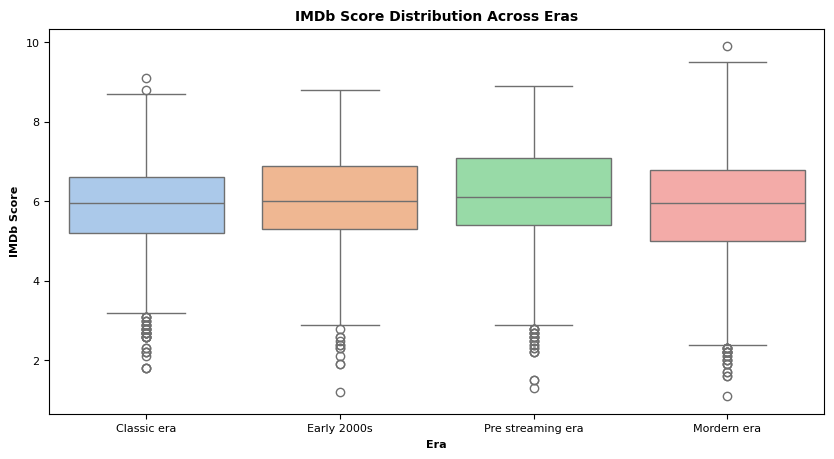

In [10]:
# Chart - 11 visualization code

df_unique = df.drop_duplicates(subset='id')

plt.figure(figsize=(10,5))
sns.boxplot(data=df_unique, x='year_categories', y='imdb_score', palette='pastel')

plt.title('IMDb Score Distribution Across Eras', fontsize=10, fontweight='bold')
plt.xlabel('Era', fontsize=8, fontweight='bold')
plt.ylabel('IMDb Score', fontsize=8, fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

##### 1. Why did you pick the specific chart?

1. **Shows Distribution Clearly:**
A boxplot visually summarizes the distribution of IMDb scores (median, quartiles, range) for each era.

2. **Highlights Medians & Spread:**
Makes it easy to compare the typical (median) IMDb scores between eras at a glance.

3. **Outliers Are Visible:**
Helps identify outliers (very high or low-rated content) clearly for each era.

##### 2. What is/are the insight(s) found from the chart?

1. **IMDb Ratings Have Stayed Similar Over Time:**
Most shows and movies across all eras have IMDb scores around 6 on average. This means the overall quality of content has stayed mostly steady over the years.

2.  **Low IMDb Score Outliers Exist in All Eras:**
Every era — Classic, Early 2000s, Pre-Streaming, and Modern — contains titles with very low IMDb scores (below 3). In fact, Early 2000s and Pre-Streaming Eras have some of the lowest IMDb-rated titles, even lower than Classic Era.

3. **Pre-Streaming Era has a slightly higher median:**
Content released during the Pre-Streaming Era had slightly better typical ratings (median higher) than other eras. However, it still includes both high and low-rated content.

4. **Modern Era Has Wider Score Range:**
The Modern Era spans from very low (around 1) to very high (almost 10) IMDb scores, indicating Amazon is adding both top-rated originals and lower-rated content more frequently in recent years.

5. **No Big Change in Quality Over Time:**
No era clearly stands out as being much better or worse. Amazon seems to have kept a balance of average, good, and niche content throughout all eras.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. **Stable IMDb Ratings Over Time:**
Amazon Prime's content quality has remained steady, so the focus could shift from maintaining consistency to raising the average quality to differentiate from competitors.

2. **Presence of Low-Rated Content in All Eras:**
Since low-rated titles appear in every era, Amazon should consider stricter curation or quality filters to improve the platform’s perceived quality.

3. **Pre-Streaming Era’s Slightly Better Median:**
Learning from the content strategies of the Pre-Streaming Era could help Amazon replicate a more favorable content mix moving forward.

4. **Wide Range in Modern Era:**
The wide quality range today suggests a strategy mixing hits and risks. Amazon could refine this approach by reducing very low-rated additions while continuing to invest in top-rated originals.



#### Chart - 12 Highest Rated Content on Amazon Prime

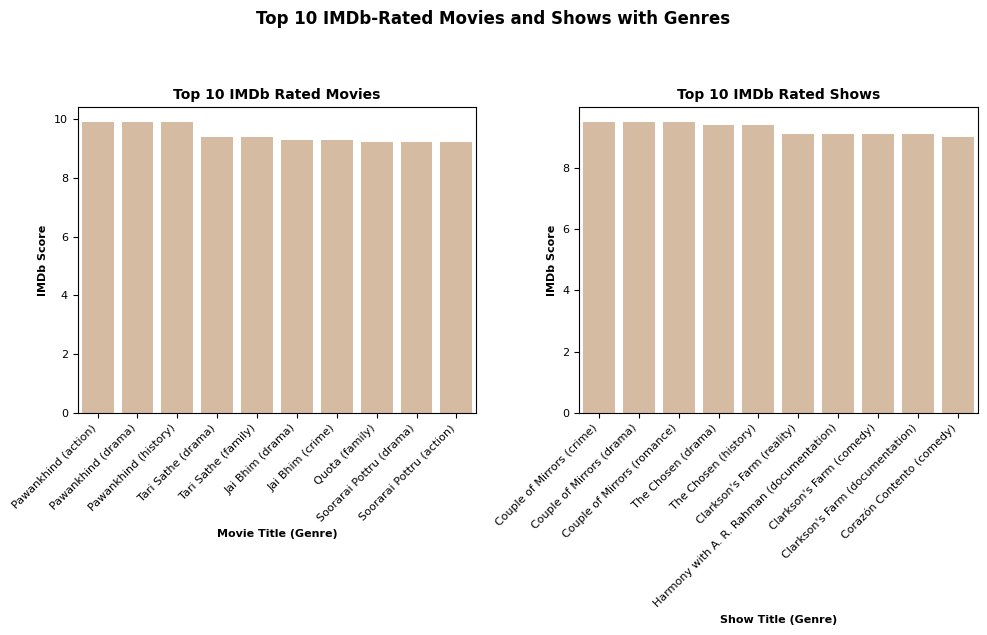

In [99]:
# Chart - 12 visualization code
# top 10 movies and top 10 shows by imdb rating


df_unique_movies=df_unique[df_unique['type']=='MOVIE']

df_unique_shows=df_unique[df_unique['type']=='SHOW']


df_unique_movies.sort_values(by='imdb_score', ascending=False, inplace=True)
df_unique_shows.sort_values(by='imdb_score', ascending=False, inplace=True)

df_unique_movies=df_unique_movies.head(10)
df_unique_shows=df_unique_shows.head(10)

# Create new column combining title and genres
df_unique_movies['title_genre'] = df_unique_movies['title'] + ' (' + df_unique_movies['genres'] + ')'
df_unique_shows['title_genre'] = df_unique_shows['title'] + ' (' + df_unique_shows['genres'] + ')'

fig,ax=plt.subplots(1,2, figsize=(10,6))

color=sns.color_palette('pastel')[5]

sns.barplot(data=df_unique_movies, x='title_genre', y='imdb_score', ax=ax[0], color=color)
ax[0].set_title('Top 10 IMDb Rated Movies', fontsize=10, fontweight='bold')
ax[0].set_xlabel('Movie Title (Genre)', fontsize=8, fontweight='bold')
ax[0].set_ylabel('IMDb Score', fontsize=8, fontweight='bold')
ax[0].tick_params(axis='x', labelsize=8, rotation=45)
ax[0].tick_params(axis='y', labelsize=8)
ax[0].set_xticklabels(labels=df_unique_movies['title_genre'], ha='right')


sns.barplot(data=df_unique_shows, x='title_genre', y='imdb_score', ax=ax[1], color=color)
ax[1].set_title('Top 10 IMDb Rated Shows', fontsize=10, fontweight='bold')
ax[1].set_xlabel('Show Title (Genre)', fontsize=8, fontweight='bold')
ax[1].set_ylabel('IMDb Score', fontsize=8, fontweight='bold')
ax[1].tick_params(axis='x', labelsize=8, rotation=45)
ax[1].tick_params(axis='y', labelsize=8)
ax[1].set_xticklabels(labels=df_unique_shows['title_genre'], ha='right')


plt.suptitle('Top 10 IMDb-Rated Movies and Shows with Genres', fontsize=12, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()





##### 1. Why did you pick the specific chart?


1. Simple and direct for ranking comparisons.

2. Best for: Highlighting highest-rated entities (movies, shows).



##### 2. What is/are the insight(s) found from the chart?

1. Drama remains the most reliable genre for high IMDb-rated content on Amazon Prime, for both movies and shows.

2. Documentaries consistently receive high ratings among shows and are also recognized among movies suggesting audiences value informative and real-life content.

3. High ratings are spread across multiple genres, indicating Amazon's success is not tied to any single type of content.

4. All top-rated movies and shows have IMDb scores between approximately 9 and 10. This suggests that top content is consistently excellent but hard to differentiate purely by IMDb score alone.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Drama consistently attracts audiences and delivers quality content, making it a safe and strategic genre for Amazon to continue investing in.

2. Even though documentaries are niche, they deliver strong audience satisfaction. Amazon can view this as an opportunity to expand or highlight quality documentaries.

3. Amazon’s success isn’t dependent on just Drama or Documentaries — a diverse content strategy works well. Continuing to offer variety appeals to broader audiences.

4. IMDb score alone may not be enough for Amazon to market or differentiate top content. Amazon should focus on promoting top-rated titles based on other factors too — such as genre, awards, popularity, or unique storytelling — not just their IMDb rating, since many titles cluster around the same high score.

#### Chart - 13 Most Featured Actors and Directors in the Catalog

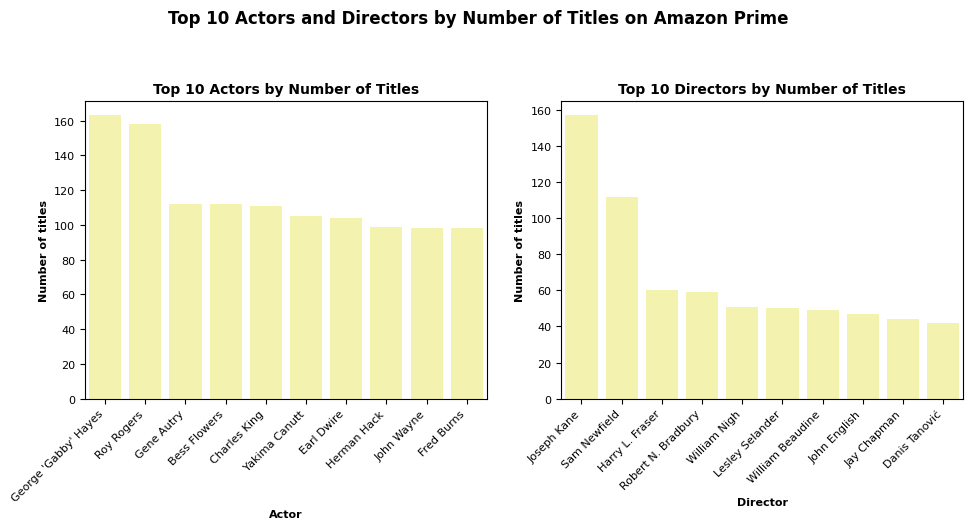

In [106]:
# Chart - 13 visualization code

df_actors=df[df['role']=='ACTOR']
df_directors=df[df['role']=='DIRECTOR']


top_10_actors=df_actors['name'].value_counts().head(10).reset_index()
top_10_directors=df_directors['name'].value_counts().head(10).reset_index()




fig,ax=plt.subplots(1,2, figsize=(10,5))

color=sns.color_palette('pastel')[8]

sns.barplot(data=top_10_actors, x='name', y='count', ax=ax[0], color=color)
ax[0].set_title('Top 10 Actors by Number of Titles', fontsize=10, fontweight='bold')
ax[0].set_xlabel('Actor', fontsize=8, fontweight='bold')
ax[0].set_ylabel('Number of titles', fontsize=8, fontweight='bold')
ax[0].tick_params(axis='x', labelsize=8, rotation=45)
ax[0].tick_params(axis='y', labelsize=8)
ax[0].set_xticklabels(labels=top_10_actors['name'], ha='right')


sns.barplot(data=top_10_directors, x='name', y='count', ax=ax[1], color=color)
ax[1].set_title('Top 10 Directors by Number of Titles', fontsize=10, fontweight='bold')
ax[1].set_xlabel('Director', fontsize=8, fontweight='bold')
ax[1].set_ylabel('Number of titles', fontsize=8, fontweight='bold')
ax[1].tick_params(axis='x', labelsize=8, rotation=45)
ax[1].tick_params(axis='y', labelsize=8)
ax[1].set_xticklabels(labels=top_10_directors['name'], ha='right')


plt.suptitle('Top 10 Actors and Directors by Number of Titles on Amazon Prime', fontsize=12, fontweight='bold', y=1.05)

plt.subplots_adjust(wspace=9.5)



plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

1. Simple and direct for ranking comparisons.

2. Best for highlighting the most frequent entities (actors, directors).

##### 2. What is/are the insight(s) found from the chart?

1. George 'Gabby' Hayes and Roy Rogers are highly prolific actors, each appearing in over 150 titles on Amazon Prime. This suggests their content forms a significant part of the platform's catalog.

2. The gap between the top 2 actors and others is large. Most other actors in the top 10 appear in fewer than 120 titles.

3. Joseph Kane leads significantly, directing over 150 titles, far more than others on the list. This highlights his strong contribution to Amazon’s content library.

4. Sam Newfield is also highly prolific, with over 100 titles, followed by a noticeable drop for others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

After the top 2 actors and directors, the numbers drop a lot. This shows Amazon relies on a small group and doesn’t have enough variety so work with more creators and bring in diverse content to offer a wider choice to viewers.

#### Chart - 14 - Correlation Heatmap

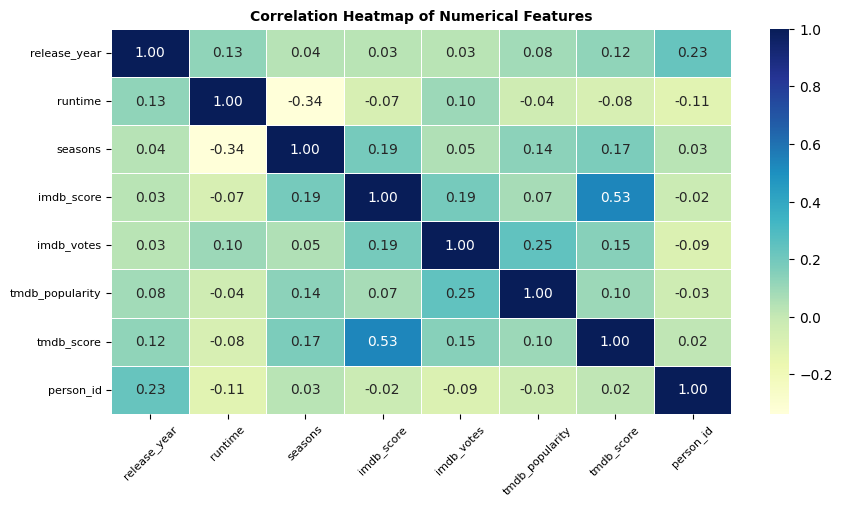

In [20]:
# Correlation Heatmap visualization code

# Select only numerical columns
numeric_cols = df_unique.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=10, fontweight='bold')
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.show()

##### 1. Why did you pick the specific chart?

1. **Clear Visual of Relationships:** A heatmap visually shows how strongly numerical variables are related (positively or negatively) through colors. Strong correlations are easy to spot at a glance.

2. **Supports Decision-Making:** It informs decisions like which variables might be redundant (high correlation) or which ones contribute unique information (low correlation).

##### 2. What is/are the insight(s) found from the chart?

1. **IMDb Score & TMDb Score Have Moderate Positive Correlation (0.53):**
This shows that content rated higher on IMDb tends to be rated higher on TMDb as well, though the relationship is not perfect suggesting When a movie or show performs well on one platform, it's likely to perform reasonably well on the other too. However, the correlation isn't perfect (0.53), so relying solely on one platform’s rating may not capture the full picture of audience reception.

2. **Seasons & Runtime Have Weak Negative Correlation (-0.34):**
Titles with more seasons tend to have shorter average runtimes (likely TV shows vs. movies).

3. **IMDb Votes & TMDb Popularity Have Weak Positive Correlation (0.25):**
Content with more IMDb votes tends to be slightly more popular on TMDb as well.
However, the correlation is weak (0.25), so popularity on one platform doesn’t guarantee the same level of attention on another — audience preferences may still vary.

4. **No Strong Correlation with Release Year:** Release year does not strongly correlate with any feature, suggesting that recentness doesn’t directly impact scores, votes, or popularity suggesting content success depends more on the quality and audience engagement, not simply on how recent it is.



#### Chart - 15 - Pair Plot

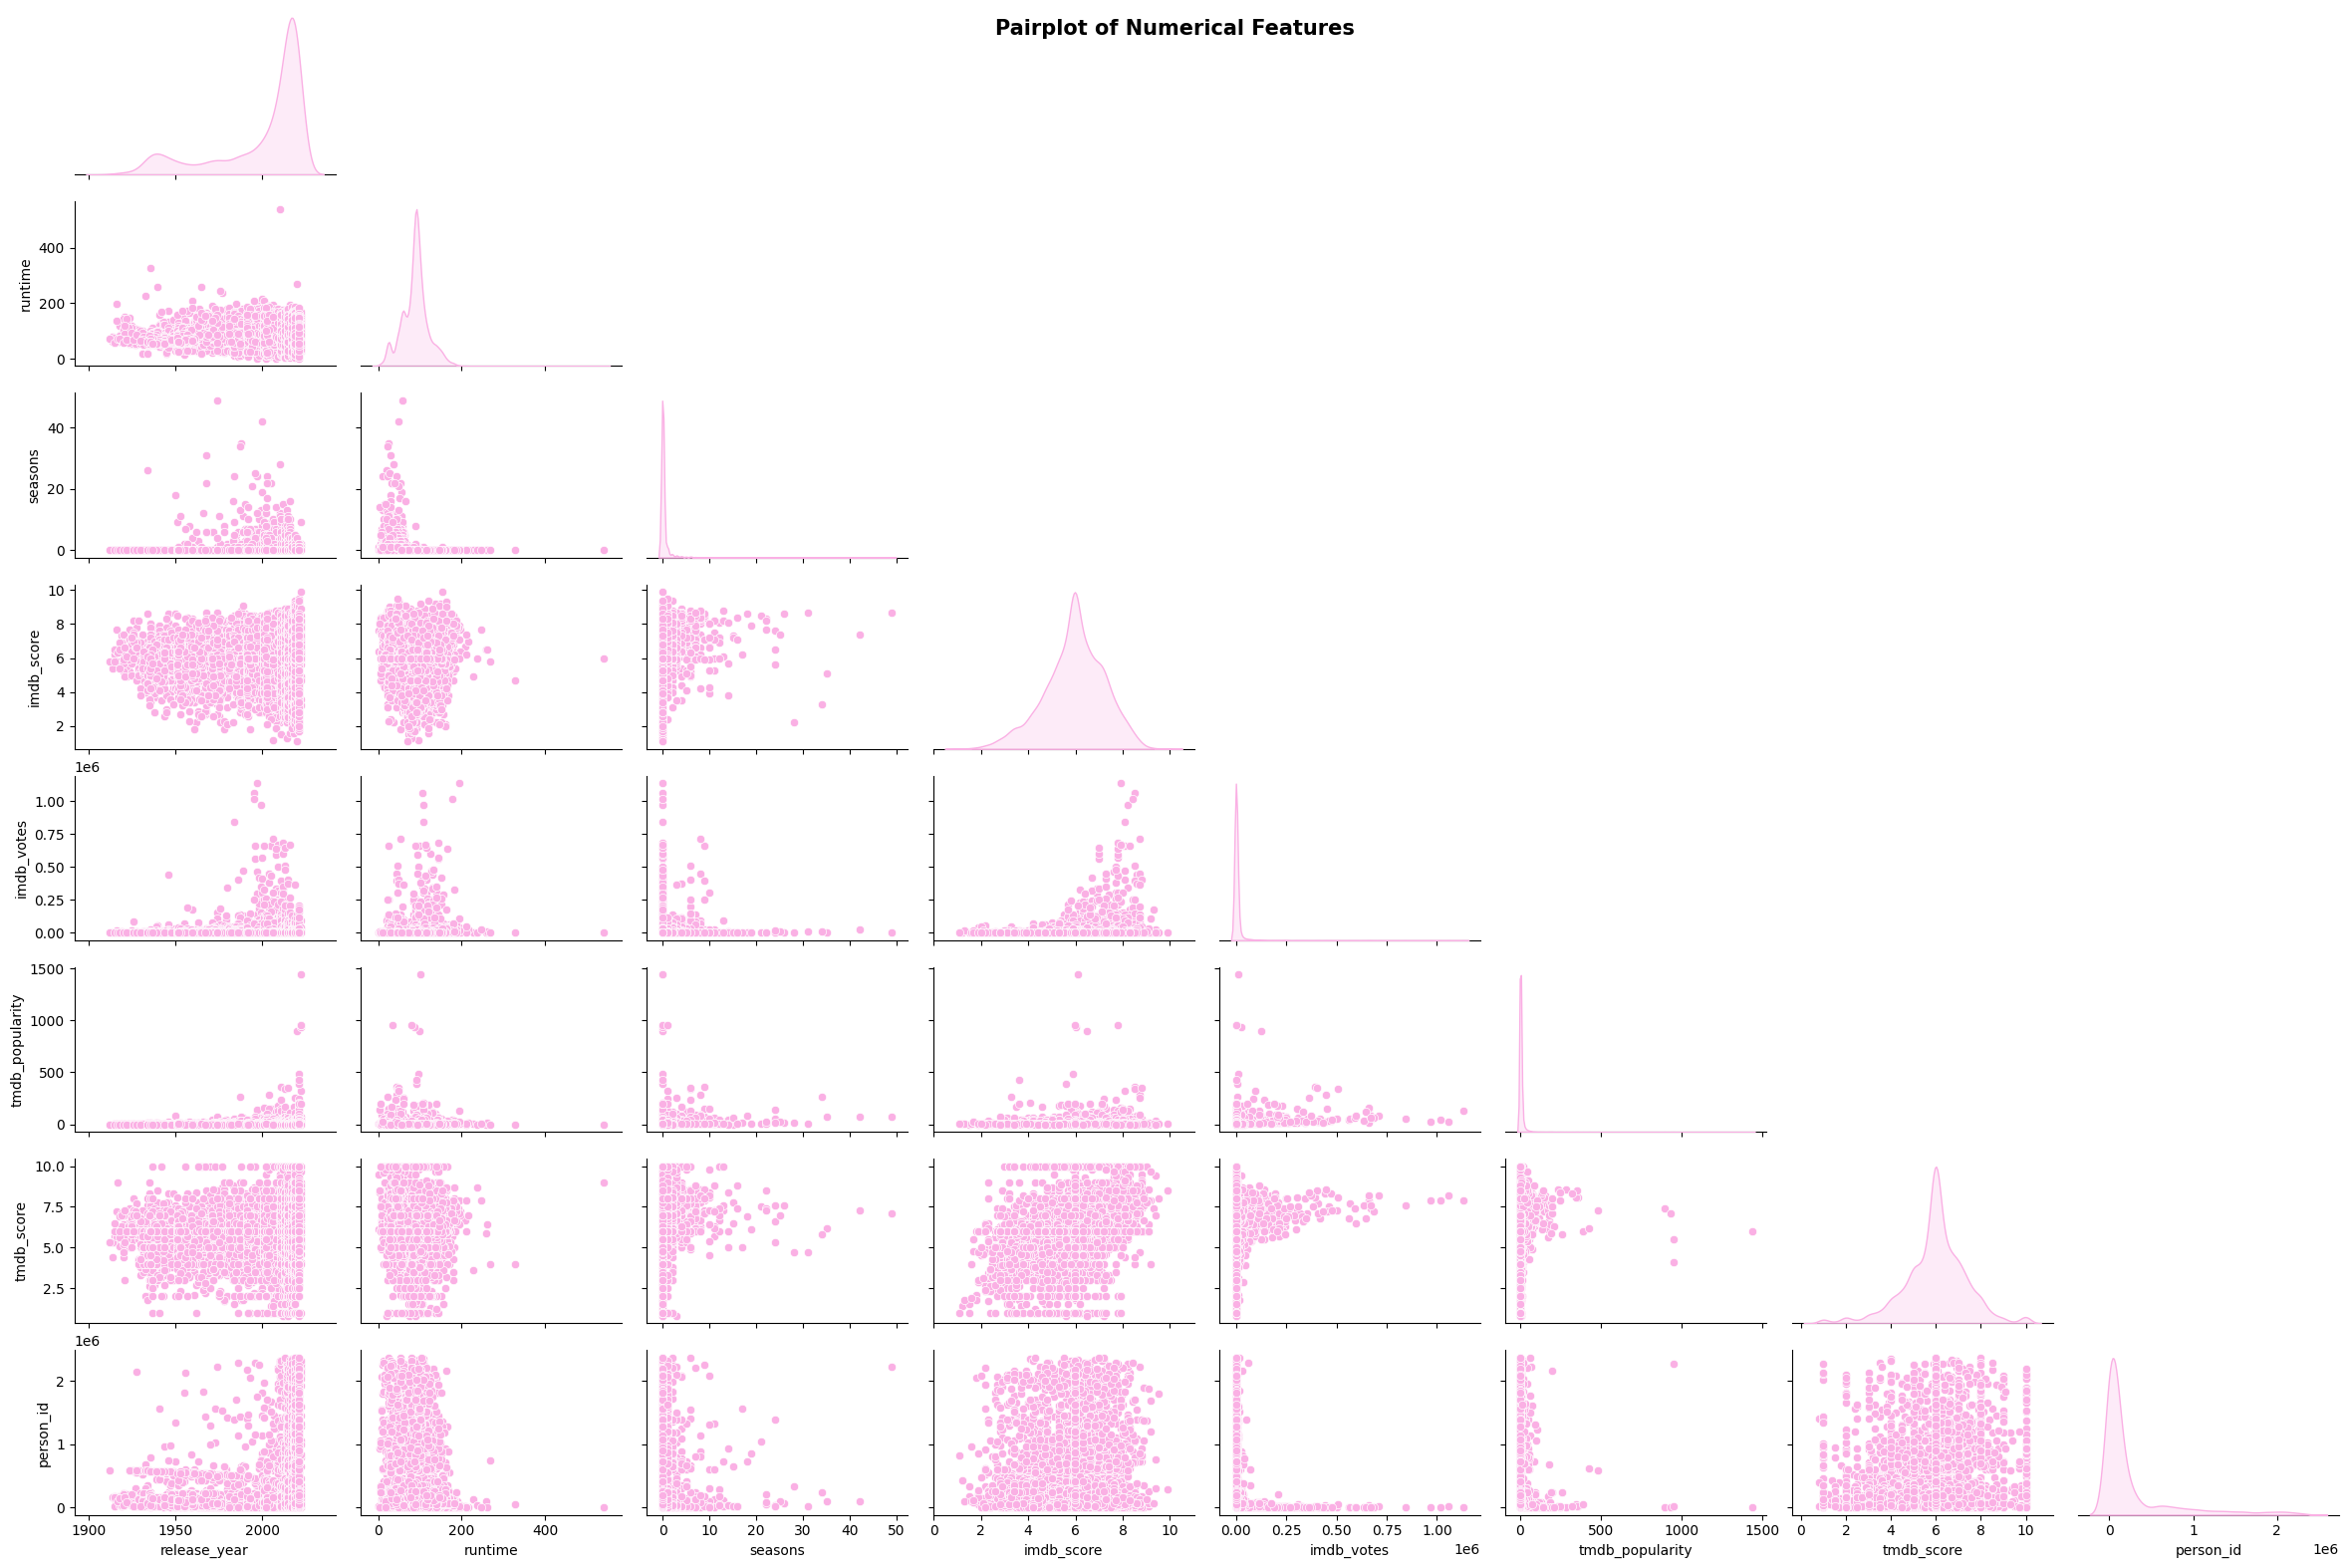

In [24]:
# Pair Plot visualization code

import seaborn as sns
import matplotlib.pyplot as plt



color=sns.color_palette('pastel')[6]


# Plot pairplot
sns.pairplot(numeric_cols, diag_kind='kde', corner=True,palette='pastel',plot_kws={'color': color},
             diag_kws={'color': color}, height=2, aspect=1.5)

plt.suptitle('Pairplot of Numerical Features', fontsize=15, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

1. **Quickly Visualizes Relationships Between Multiple Variables:**
A pairplot lets you see all pairwise relationships between numerical variables at once, helping identify trends, patterns, and potential correlations visually.

2. **Shows Both Distributions and Scatter Relationships:**
It combines histograms or KDE plots (diagonal) to show individual distributions, and scatter plots (off-diagonal) to show relationships between variables. This gives a full picture of your data.

##### 2. What is/are the insight(s) found from the chart?

1. **IMDb Score vs. TMDb Score:**
There is a positive relationship between IMDb Score and TMDb Score. Higher IMDb-rated content also tends to receive higher TMDb ratings, though the relationship isn't perfect.

2. **IMDb Votes vs. IMDb Popularity:**
There is a weak positive correlation between the number of IMDb votes and TMDb popularity. Content with higher votes tends to be slightly more popular on TMDb.

3. **Runtime vs. Seasons:**
There’s a negative relationship between Runtime and Seasons. Titles with more seasons (likely shows) usually have shorter runtimes per episode, while longer runtimes are often single movies.

4. **Distributions are Highly Skewed:**

* IMDb Votes and TMDb Popularity are both heavily skewed with a small number of titles having very high numbers.

* Runtime also shows a large cluster around shorter durations, with a few very long outliers.



## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

 1. Double down on Drama — it's high-quality and has broad appeal.

2.  Invest in Comedy selectively; promote titles with strong quality indicators.

3. Grow Documentary and Romance segments, especially for quality-seeking niches.

4. Diversify sourcing beyond U.S. — India is a high-potential market.

5. License or co-produce more regional content in countries like France/Germany/Italy.

6. Use each country's strong genres to improve recommendations and keep viewers interested.For example Japan is great at making anime so show more of these to people who like these genres.

7. Expand high-quality shows — important for retention & binge-watching behavior.

8. Use historical performance data (from Pre-streaming era) to inspire new original formats.

9. Promote top-rated but under-watched titles (e.g., hidden gems in documentary)


# **Conclusion**

### **Summarize Key Findings**
1. **Content Composition and Genre Trends:**

*  Amazon Prime Video is movie-heavy (~90%), but shows are growing steadily, especially in the modern era.

* Drama is the dominant genre across most charts — it consistently appears in top-rated, blockbuster, and underrated groups.

* Comedy appears widely but varies in quality; Documentaries and Romance show high ratings but low popularity.

2. **Regional Content & Genre Strengths:**

* U.S. still leads in content volume, but its dominance has declined over time.

* India is rapidly growing and now contributes ~24% of content.

* Japan excels in Animation, Action, and Sci-Fi; European countries (France, Germany, Italy) focus more on regional Content.

3. **Time-based Evolution:**

* Content growth surged between 2016–2021 but has slowed down from 2021 to 2022.

* Modern-era content has the widest quality range — both highly-rated and poorly-rated titles are more common.

* Pre-streaming content had slightly higher median IMDb ratings, suggesting consistent quality in that period.

4. **Ratings and Performance Patterns:**

* IMDb and TMDb scores are positively correlated, though not perfectly aligned.

* Popularity and vote counts are skewed — a few titles dominate attention.

* Hidden gems exist: several documentaries are highly rated but under-watched.

### **Business Interpretation**

1. Drama drives both quality and popularity, making it a cornerstone of user engagement.

2. Underrated high-quality content (especially documentaries) indicates missed promotion opportunities.

3. Regional strengths are underutilized — Japan’s anime or regional content(european) from Germany/France/Italy can be used better for local recommendations.

4. Shift in content sourcing (U.S. to India and beyond) shows diversification, but strategy needs refinement.

5. Pre-streaming era content is of stable quality — a potential model for new originals.

6. Modern content is riskier — quality control is needed to maintain brand trust.

### **Suggested Actions**
1. **Double Down on Drama & Quality Comedy:**
Invest in content that balances wide appeal and high quality. Promote drama and high-quality comedy more prominently.

2. **Promote Hidden Gems:**
Use platform banners, watchlists, and personalized feeds to highlight under-watched but highly rated documentaries and niche genres.

3. **Regional Strategy Optimization:**Tailor recommendations by leveraging genre strengths of each region.Example: Recommend Japanese anime to anime lovers globally; push European content in culturally aligned markets.

4. **Expand High-Quality Shows:**
Boost show count to increase binge-watch opportunities — vital for long-term user retention.

5. **Diversify Beyond U.S. Focus:**
Invest more in Indian original content. Co-produce or license high-potential local hits.

6. **Learn from Pre-Streaming Era:**
Study the consistency in older successful titles to guide format, pacing, or storytelling for new originals.

7. **Balance Risk in Modern Titles:**
Maintain quality control on recent additions — avoid overwhelming users with low-rated content.

